# EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from tqdm.notebook import tqdm

random.seed(42)
np.random.seed(42)

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100725 entries, 0 to 100724
Data columns (total 53 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    100725 non-null  object 
 1   url_car       98596 non-null   object 
 2   car_make      98596 non-null   object 
 3   car_model     98596 non-null   object 
 4   car_gen       98596 non-null   object 
 5   car_type      98596 non-null   object 
 6   car_compl     98596 non-null   object 
 7   ann_date      98596 non-null   object 
 8   ann_id        98596 non-null   float64
 9   car_price     98596 non-null   float64
 10  ann_city      98596 non-null   object 
 11  link_cpl      98596 non-null   object 
 12  avail         98596 non-null   object 
 13  year          98596 non-null   float64
 14  mileage       98596 non-null   float64
 15  color         98596 non-null   object 
 16  eng_size      97010 non-null   float64
 17  eng_power     98596 non-null   float64
 18  eng_

In [6]:
df.isnull().sum()/len(df)

Unnamed: 0      0.000000
url_car         0.021137
car_make        0.021137
car_model       0.021137
car_gen         0.021137
car_type        0.021137
car_compl       0.021137
ann_date        0.021137
ann_id          0.021137
car_price       0.021137
ann_city        0.021137
link_cpl        0.021137
avail           0.021137
year            0.021137
mileage         0.021137
color           0.021137
eng_size        0.036883
eng_power       0.021137
eng_power_kw    0.984254
eng_type        0.021137
pow_resrv       0.984254
options         0.021226
transmission    0.021137
drive           0.021137
st_wheel        0.021137
condition       0.021137
count_owner     0.021137
original_pts    0.025197
customs         0.021137
url_compl       0.021137
state_mark      0.021137
class_auto      0.024602
door_count      0.021137
seat_count      0.021137
long            0.021137
widht           0.021137
height          0.021137
clearence       0.047843
v_bag           0.093512
v_tank          0.049342
curb_weight     0.048757
gross_weight    0.149059
front_brakes    0.021137
rear_brakes     0.034550
max_speed       0.069655
acceleration    0.092648
fuel_cons       0.155810
fuel_brand      0.041479
engine_loc1     0.037955
engine_loc2     0.046840
turbocharg      0.037578
max_torq        0.026101
cyl_count;      0.021137
dtype: float64

In [7]:
df.drop("Unnamed: 0" , axis='columns', inplace=True)

In [8]:
df = df.rename(columns={'cyl_count;': 'cyl_count'})

In [9]:
df['cyl_count'] = df['cyl_count'].str.rstrip(';')

Посмотрим, где options равно NaN.

In [10]:
df[df['options'].isnull()]

url_car car_make car_model car_gen car_type car_compl ann_date  ann_id  \
18         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
50         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
67         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
85         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
104        NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
...        ...      ...       ...     ...      ...       ...      ...     ...   
100237     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100695     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100697     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100699     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100723     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   

        car_price ann_city  ... rear_brakes max_speed  acceleration  \
18            NaN      NaN  ...         NaN       NaN           NaN   
50            NaN      NaN  ...         NaN       NaN           NaN   
67            NaN      NaN  ...         NaN       NaN           NaN   
85            NaN      NaN  ...         NaN       NaN           NaN   
104           NaN      NaN  ...         NaN       NaN           NaN   
...           ...      ...  ...         ...       ...           ...   
100237        NaN      NaN  ...         NaN       NaN           NaN   
100695        NaN      NaN  ...         NaN       NaN           NaN   
100697        NaN      NaN  ...         NaN       NaN           NaN   
100699        NaN      NaN  ...         NaN       NaN           NaN   
100723        NaN      NaN  ...         NaN       NaN           NaN   

        fuel_cons fuel_brand  engine_loc1  engine_loc2  turbocharg max_torq  \
18            NaN        NaN          NaN          NaN         NaN      NaN   
50            NaN        NaN          NaN          NaN         NaN      NaN   
67            NaN        NaN          NaN          NaN         NaN      NaN   
85            NaN        NaN          NaN          NaN         NaN      NaN   
104           NaN        NaN          NaN          NaN         NaN      NaN   
...           ...        ...          ...          ...         ...      ...   
100237        NaN        NaN          NaN          NaN         NaN      NaN   
100695        NaN        NaN          NaN          NaN         NaN      NaN   
100697        NaN        NaN          NaN          NaN         NaN      NaN   
100699        NaN        NaN          NaN          NaN         NaN      NaN   
100723        NaN        NaN          NaN          NaN         NaN      NaN   

        cyl_count  
18            NaN  
50            NaN  
67            NaN  
85            NaN  
104           NaN  
...           ...  
100237        NaN  
100695        NaN  
100697        NaN  
100699        NaN  
100723        NaN  

[2138 rows x 52 columns]

Возможно это дубликаты, просто размещенные в разных городах. Проверим это.

In [11]:
indx = [79660, 80472, 80744, 81009, 81194, 81318, 81550, 82017, 82247]
df.iloc[indx].duplicated()

79660    False
80472    False
80744    False
81009    False
81194    False
81318    False
81550    False
82017    False
82247    False
dtype: bool

In [12]:
pd.set_option('display.max_columns', None)
df[df['options'].isnull()]

url_car car_make car_model car_gen car_type car_compl ann_date  ann_id  \
18         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
50         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
67         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
85         NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
104        NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
...        ...      ...       ...     ...      ...       ...      ...     ...   
100237     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100695     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100697     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100699     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   
100723     NaN      NaN       NaN     NaN      NaN       NaN      NaN     NaN   

        car_price ann_city link_cpl avail  year  mileage color  eng_size  \
18            NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
50            NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
67            NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
85            NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
104           NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
...           ...      ...      ...   ...   ...      ...   ...       ...   
100237        NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
100695        NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
100697        NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
100699        NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   
100723        NaN      NaN      NaN   NaN   NaN      NaN   NaN       NaN   

        eng_power  eng_power_kw eng_type  pow_resrv options transmission  \
18            NaN           NaN      NaN        NaN     NaN          NaN   
50            NaN           NaN      NaN        NaN     NaN          NaN   
67            NaN           NaN      NaN        NaN     NaN          NaN   
85            NaN           NaN      NaN        NaN     NaN          NaN   
104           NaN           NaN      NaN        NaN     NaN          NaN   
...           ...           ...      ...        ...     ...          ...   
100237        NaN           NaN      NaN        NaN     NaN          NaN   
100695        NaN           NaN      NaN        NaN     NaN          NaN   
100697        NaN           NaN      NaN        NaN     NaN          NaN   
100699        NaN           NaN      NaN        NaN     NaN          NaN   
100723        NaN           NaN      NaN        NaN     NaN          NaN   

       drive st_wheel condition count_owner original_pts customs url_compl  \
18       NaN      NaN       NaN         NaN          NaN     NaN       NaN   
50       NaN      NaN       NaN         NaN          NaN     NaN       NaN   
67       NaN      NaN       NaN         NaN          NaN     NaN       NaN   
85       NaN      NaN       NaN         NaN          NaN     NaN       NaN   
104      NaN      NaN       NaN         NaN          NaN     NaN       NaN   
...      ...      ...       ...         ...          ...     ...       ...   
100237   NaN      NaN       NaN         NaN          NaN     NaN       NaN   
100695   NaN      NaN       NaN         NaN          NaN     NaN       NaN   
100697   NaN      NaN       NaN         NaN          NaN     NaN       NaN   
100699   NaN      NaN       NaN         NaN          NaN     NaN       NaN   
100723   NaN      NaN       NaN         NaN          NaN     NaN       NaN   

       state_mark class_auto  door_count  seat_count  long  widht  height  \
18            NaN        NaN         NaN         NaN   NaN    NaN     NaN   
50            NaN        NaN         NaN         NaN   NaN    NaN     NaN   
67            NaN        NaN         NaN

Все таки это точно разные объявления, так как помимо региона размещения разная цена, разное количество владельцев, цвет.

In [13]:
df[(df['car_make'] == 'Subaru') & (df['car_model'] == 'Outback')]

url_car car_make car_model  \
79534  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
79553  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
79558  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
79570  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
79585  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
...                                                  ...      ...       ...   
82247  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
82264  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
82285  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
82291  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   
82293  https://auto.ru/cars/used/sale/subaru/outback/...   Subaru   Outback   

            car_gen         car_type               car_compl    ann_date  \
79534             V  Универсал 5 дв.  2.5 CVT (175 л.с.) 4WD  2024-11-19   
79553           III  Универсал 5 дв.   2.5 AT (165 л.с.) 4WD  2024-11-20   
79558  V Рестайлинг  Универсал 5 дв.  2.5 CVT (175 л.с.) 4WD  2024-11-20   
79570             V  Универсал 5 дв.  2.5 CVT (175 л.с.) 4WD  2024-11-13   
79585            VI  Универсал 5 дв.  2.5 CVT (188 л.с.) 4WD  2024-11-20   
...             ...              ...                     ...         ...   
82247            IV  Универсал 5 дв.  2.5 CVT (167 л.с.) 4WD  2024-04-12   
82264            II  Универсал 5 дв.   2.5 MT (156 л.с.) 4WD  2024-10-05   
82285            II  Универсал 5 дв.   2.5 AT (156 л.с.) 4WD  2024-10-14   
82291            II  Универсал 5 дв.   2.5 AT (156 л.с.) 4WD  2024-10-24   
82293            II  Универсал 5 дв.   2.5 AT (156 л.с.) 4WD  2024-03-28   

             ann_id  car_price         ann_city  \
79534  1.123012e+09  1988000.0          Воронеж   
79553  1.126042e+09   589000.0     Екатеринбург   
79558  1.125338e+09  2719000.0        Ярославль   
79570  1.125938e+09  2133000.0  Нижний Новгород   
79585  1.125825e+09  3200000.0            Минск   
...             ...        ...              ...   
82247  1.122991e+09  1750000.0            Томск   
82264  1.125331e+09   500000.0          Воронеж   
82285  1.125457e+09   580000.0        Краснодар   
82291  1.125620e+09   430000.0         Смоленск   
82293  1.122787e+09   700000.0          Воронеж   

                                                link_cpl      avail    year  \
79534  https://auto.ru/catalog/cars/subaru/outback/20...  В наличии  2016.0   
79553  https://auto.ru/catalog/cars/subaru/outback/34...  В наличии  2005.0   
79558  https://auto.ru/catalog/cars/subaru/outback/21...  В наличии  2018.0   
79570  https://auto.ru/catalog/cars/subaru/outback/20...  В наличии  2016.0   
79585  https://auto.ru/catalog/cars/subaru/outback/21...  В наличии  2019.0   
...                                                  ...        ...     ...   
82247  https://auto.ru/catalog/cars/subaru/outback/60...  В наличии  2011.0   
82264  https://auto.ru/catalog/cars/subaru/outback/34...  В наличии  2001.0   
82285  https://auto.ru/catalog/cars/subaru/outback/34...  В наличии  1999.0   
82291  https://auto.ru/catalog/cars/subaru/outback/34...  В наличии  2000.0   
82293  https://auto.ru/catalog/cars/subaru/outback/34...  В наличии  2001.0   

        mileage       color  eng_size  eng_power  eng_power_kw eng_type  \
79534  216491.0       серый       2.5      175.0           NaN   Бензин   
79553  197876.0       серый       2.5      165.0           NaN   Бензин   
79558  148567.0       синий       2.5      175.0           NaN   Бензин   
79570  215910.0       серый       2.5      175.0           NaN   Бензин   
79585   57000.0     зелёный       2.5      188.0           NaN   Бензин   
...         ...         ...       ...        ...           ...      ...   
82247  195427.0  золотистый       2.5      167.0           NaN   Бензин   
82264  254000.0     зелён

In [14]:
df[(df['car_make'] == 'Subaru') & (df['car_model'] == 'Outback')]['options'].value_counts().reset_index()

options  count
0       1 опция     89
1            BA     14
2    Premium ES     13
3            PA     10
4       Premium      9
..          ...    ...
72    110 опций      1
73     58 опций      1
74  Elegance ES      1
75     78 опций      1
76     38 опций      1

[77 rows x 2 columns]

In [15]:
df = df.dropna(subset = ['options'])

1. Датасет содержит нулевые значения, наибольшее их количество в полях, связанных с мощностью и запасом хода электромобилей. В связи с небошльшим их объем в датасете, полагаю лучшим решением удалить поля с указанными данными.
2. Для электрокаров укажем количество цилиндров - 0
3. Для электрокаров укажем объем двигателя - 0

In [16]:
df = df.drop(columns = ['eng_power_kw', 'pow_resrv'])
df['cyl_count'] = df['cyl_count'].replace('', np.nan)
df['cyl_count'] = df['cyl_count'].fillna(0)
df['eng_size'] = df['eng_size'].fillna(0)

In [17]:
df['ann_date'] = pd.to_datetime(df['ann_date'])
df['car_price'] = df['car_price'].astype('float')
df['year'] = df['year'].astype('float')
df['mileage'] = df['mileage'].astype('float')/1000
df['eng_size'] = df['eng_size'].astype('float')
df['eng_power'] = df['eng_power'].astype('float')
df['door_count'] = df['door_count'].astype('float')
df['seat_count'] = df['seat_count'].astype('float')
df['long'] = df['long'].astype('float')/1000
df['widht'] = df['widht'].astype('float')/1000
df['height'] = df['height'].astype('float')/1000
df['clearence'] = df['clearence'].astype('float')/10
df['v_bag'] = df['v_bag'].astype('float')
df['v_tank'] = df['v_tank'].astype('float')
df['curb_weight'] = df['curb_weight'].astype('float')/1000
df['gross_weight'] = df['gross_weight'].astype('float')/1000
df['max_speed'] = df['max_speed'].astype('float')
df['acceleration'] = df['acceleration'].astype('float')
df['fuel_cons'] = df['fuel_cons'].astype('float')
df['max_torq'] = df['max_torq'].astype('float')
df['cyl_count'] = df['cyl_count'].astype('float')

In [18]:
df[df['class_auto'].isnull()]

url_car  car_make  \
229     https://auto.ru/cars/used/sale/adler/trumpf_ju...     Adler   
230     https://auto.ru/cars/used/sale/adler/trumpf_ju...     Adler   
231     https://auto.ru/cars/used/sale/aion/y_plus/112...  GAC Aion   
6505    https://auto.ru/cars/used/sale/buick/special/1...     Buick   
6625    https://auto.ru/cars/used/sale/buick/special/1...     Buick   
...                                                   ...       ...   
100600  https://auto.ru/cars/used/sale/zis/110/1120621...       ЗиС   
100601  https://auto.ru/cars/used/sale/zis/110/1122366...       ЗиС   
100602  https://auto.ru/cars/used/sale/zis/110/1106214...       ЗиС   
100603  https://auto.ru/cars/used/sale/zis/101/1124188...       ЗиС   
100604  https://auto.ru/cars/used/sale/zis/101/1102639...       ЗиС   

            car_model    car_gen           car_type  \
229     Trumpf Junior          I        Седан 2 дв.   
230     Trumpf Junior          I        Седан 2 дв.   
231            Y Plus  2022-н.в.  Внедорожник 5 дв.   
6505          Special          I              Седан   
6625          Special         II              Седан   
...               ...        ...                ...   
100600            110  1945-1958            Лимузин   
100601            110  1945-1958            Лимузин   
100602            110  1945-1958            Лимузин   
100603            101  1936-1941              Седан   
100604            101  1936-1941              Седан   

                            car_compl   ann_date        ann_id   car_price  \
229                  1.0 MT (25 л.с.) 2024-08-28  1.091223e+09   3000000.0   
230                  1.0 MT (25 л.с.) 2024-08-18  1.120159e+09   2500000.0   
231     61.7 kWh Electro AT (150 кВт) 2024-10-31  1.125406e+09   3450000.0   
6505                4.1 MT (112 л.с.) 2024-11-01  1.121125e+09   1234567.0   
6625                4.1 MT (117 л.с.) 2024-11-14  1.045783e+09   4200000.0   
...                               ...        ...           ...         ...   
100600              6.0 MT (140 л.с.) 2024-09-24  1.120622e+09  14000000.0   
100601              6.0 MT (140 л.с.) 2024-02-23  1.122367e+09  70000000.0   
100602              6.0 MT (140 л.с.) 2024-12-06  1.106214e+09  15000000.0   
100603              5.8 MT (110 л.с.) 2024-07-16  1.124189e+09  95000000.0   
100604              5.8 MT (110 л.с.) 2024-03-01  1.102640e+09  40000000.0   

                           ann_city  \
229                       Ульяновск   
230                          Москва   
231                        Феодосия   
6505                         Курган   
6625                         Москва   
...                             ...   
100600                       Москва   
100601                       Москва   
100602                      Ташкент   
100603                  Новосибирск   
100604  Москва и Московская область   

                                                 link_cpl      avail    year  \
229     https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1937.0   
230     https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1935.0   
231     https://auto.ru/catalog/cars/aion/y_plus/23666...  В наличии  2023.0   
6505    https://auto.ru/catalog/cars/buick/special/206...  В наличии  1936.0   
6625    https://auto.ru/catalog/cars/buick/special/206...  В наличии  1953.0   
...                                                   ...        ...     ...   
100600  https://auto.ru/catalog/cars/zis/110/20701218/...  В наличии  1947.0   
100601  https://auto.ru/catalog/cars/zis/110/20701218/...  В наличии  1948.0   
100602  https://auto.ru/catalog/cars/zis/110/20701218/...  В наличии  1950.0   
100603  https://auto.ru/catalog/cars/zis/101/20787306/...  В наличии  1938.0   
100604  https://auto.ru/catalog/cars/zis/101/20787306/...  В наличии  1938.0   

        mileage    color  eng_size  eng_power eng_type   options  \
229       0.500    серый       1.0       25.0   Бензин   1 опция   
230     100.000  зелёный       1.

4. Исходя из специфичности фургонов введем для них новый класс авто

In [19]:
df['class_auto'].value_counts().reset_index()

class_auto  count
0          C  27531
1          D  19849
2          B  15505
3          J  12427
4          E  12400
5          M   4226
6          F   2585
7          A   2555
8          S   1160

In [20]:
df['class_auto'] = df['class_auto'].fillna('V')

Посмотрим, какие значения принимает поле "original_pts"

In [21]:
df['original_pts'].value_counts().reset_index()

original_pts  count
0     Оригинал  82730
1     Дубликат  15448

А также у каких строк отсутствует сведения о ПТС

In [22]:
df[df['original_pts'].isnull()].head(10)

url_car    car_make  \
84    https://auto.ru/cars/used/sale/acura/mdx/11255...       Acura   
147   https://auto.ru/cars/used/sale/acura/mdx/11250...       Acura   
385   https://auto.ru/cars/used/sale/alfa_romeo/stel...  Alfa Romeo   
477   https://auto.ru/cars/used/sale/alfa_romeo/145/...  Alfa Romeo   
535   https://auto.ru/cars/used/sale/alpina/b6/11245...      Alpina   
1640  https://auto.ru/cars/used/sale/audi/allroad/11...        Audi   
1667  https://auto.ru/cars/used/sale/audi/a6/1125546...        Audi   
1787  https://auto.ru/cars/used/sale/audi/rs_e_tron_...        Audi   
2079  https://auto.ru/cars/used/sale/audi/tt/1123722...        Audi   
2089  https://auto.ru/cars/used/sale/audi/a6/1125018...        Audi   

         car_model              car_gen           car_type  \
84             MDX                  III  Внедорожник 5 дв.   
147            MDX        II Рестайлинг  Внедорожник 5 дв.   
385        Stelvio                    I  Внедорожник 5 дв.   
477            145         I Рестайлинг      Хэтчбек 3 дв.   
535             B6              F12/F13               Купе   
1640    A6 allroad              IV (C8)    Универсал 5 дв.   
1667            A6               V (C8)              Седан   
1787  RS e-tron GT                    I              Седан   
2079            TT  III (8S) Рестайлинг            Родстер   
2089            A6  III (C6) Рестайлинг              Седан   

                           car_compl   ann_date        ann_id   car_price  \
84             3.5 AT (290 л.с.) 4WD 2024-10-19  1.125539e+09   2700000.0   
147            3.7 AT (300 л.с.) 4WD 2024-09-15  1.125027e+09   1950000.0   
385           2.1d AT (210 л.с.) 4WD 2024-10-13  1.125445e+09   3500000.0   
477                1.4 MT (103 л.с.) 2024-10-31  1.125717e+09    270000.0   
535                4.4 AT (540 л.с.) 2024-11-01  1.124577e+09   4780000.0   
1640   45 TDI 3.0d AT (249 л.с.) 4WD 2024-09-02  1.124831e+09   6970000.0   
1667  40 TDI 2.0d AMT (204 л.с.) 4WD 2024-11-03  1.125546e+09   6300000.0   
1787      Electro AT (475.0 кВт) 4WD 2024-10-31  1.125092e+09  15999000.0   
2079      40 TFSI 2.0 AMT (197 л.с.) 2024-06-11  1.123722e+09   4000000.0   
2089           3.0 AT (290 л.с.) 4WD 2024-09-15  1.125019e+09   1285000.0   

          ann_city                                           link_cpl  \
84       Ульяновск  https://auto.ru/catalog/cars/acura/mdx/1038270...   
147        Пестово  https://auto.ru/catalog/cars/acura/mdx/7328087...   
385         Москва  https://auto.ru/catalog/cars/alfa_romeo/stelvi...   
477    Новосибирск  https://auto.ru/catalog/cars/alfa_romeo/145/51...   
535         Москва  https://auto.ru/catalog/cars/alpina/b6/7982287...   
1640        Москва  https://auto.ru/catalog/cars/audi/allroad/2168...   
1667       Иркутск  https://auto.ru/catalog/cars/audi/a6/21210593/...   
1787  Екатеринбург  https://auto.ru/catalog/cars/audi/rs_e_tron_gt...   
2079        Москва  https://auto.ru/catalog/cars/audi/tt/21464559/...   
2089     Геленджик  https://auto.ru/catalog/cars/audi/a6/2305417/2...   

          avail    year  mileage    color  eng_size  eng_power eng_type  \
84    В наличии  2014.0  151.500  красный       3.5      290.0   Бензин   
147   В наличии  2010.0  190.000    серый       3.7      300.0   Бензин   
385   В наличии  2019.0   87.000    серый       2.1      210.0   Дизель   
477   В наличии  2000.0  100.000  красный       1.4      103.0   Бензин   
535   В наличии  2013.0  123.811    белый       4.4      540.0   Бензин   
1640  В наличии  2020.0   39.000    серый       3.0      249.0   Дизель   
1667  В наличии  2022.0    5.500    белый       2.0      204.0   Дизель   
1787  В наличии  2021.0   18.000  красный       0.0      646.0  Электро   
2079  В наличии  2019.0   63.000    белый       2.0      197.0   Бензин   
2089  В наличии  2010.0  177.000   чёрный       3.0      290.0   Бензин   

                   options      transmission     drive st_wheel  \
84                  Techno    автомати

5. Наиболее оптимальным видится замена нулевых значений на "Дубликат"

In [23]:
df['original_pts'] = df['original_pts'].fillna('Дубликат')

Посмотрим на модели у которых не указан клиренс

In [24]:
df[df['clearence'].isnull()].head(10)

url_car car_make  \
213  https://auto.ru/cars/used/sale/acura/cdx/11257...    Acura   
214  https://auto.ru/cars/used/sale/acura/cdx/11258...    Acura   
216  https://auto.ru/cars/used/sale/acura/cdx/11256...    Acura   
219  https://auto.ru/cars/used/sale/acura/cdx/11253...    Acura   
220  https://auto.ru/cars/used/sale/acura/cdx/11254...    Acura   
221  https://auto.ru/cars/used/sale/acura/cdx/11253...    Acura   
222  https://auto.ru/cars/used/sale/acura/cdx/11246...    Acura   
223  https://auto.ru/cars/used/sale/acura/cdx/11246...    Acura   
229  https://auto.ru/cars/used/sale/adler/trumpf_ju...    Adler   
230  https://auto.ru/cars/used/sale/adler/trumpf_ju...    Adler   

         car_model    car_gen           car_type           car_compl  \
213            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
214            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
216            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
219            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
220            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
221            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
222            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
223            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
229  Trumpf Junior          I        Седан 2 дв.    1.0 MT (25 л.с.)   
230  Trumpf Junior          I        Седан 2 дв.    1.0 MT (25 л.с.)   

      ann_date        ann_id  car_price      ann_city  \
213 2024-11-04  1.125782e+09  2500000.0   Владивосток   
214 2024-11-05  1.125807e+09  2395495.0  Благовещенск   
216 2024-10-24  1.125613e+09  2400000.0   Владивосток   
219 2024-10-10  1.125398e+09  2400000.0   Владивосток   
220 2024-10-12  1.125432e+09  2500000.0   Владивосток   
221 2024-10-10  1.125398e+09  2600000.0   Владивосток   
222 2024-08-21  1.124656e+09  2700000.0   Владивосток   
223 2024-08-21  1.124656e+09  2400000.0   Владивосток   
229 2024-08-28  1.091223e+09  3000000.0     Ульяновск   
230 2024-08-18  1.120159e+09  2500000.0        Москва   

                                              link_cpl      avail    year  \
213  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
214  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
216  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2020.0   
219  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
220  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
221  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
222  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2020.0   
223  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2020.0   
229  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1937.0   
230  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1935.0   

     mileage       color  eng_size  eng_power eng_type  options  \
213     28.0       белый       1.5      182.0   Бензин  1 опция   
214     45.0       синий       1.5      182.0   Бензин  1 опция   
216     59.0       белый       1.5      182.0   Бензин  9 опций   
219     40.0       белый       1.5      182.0   Бензин  1 опция   
220     40.0     красный       1.5      182.0   Бензин  1 опция   
221     30.0       синий       1.5      182.0   Бензин  1 опция   
222     60.0  коричневый       1.5      182.0   Бензин  1 опция   
223     78.0       белый       1.5      182.0   Бензин  1 опция   
229      0.5       серый       1.0       25.0   Бензин  1 опция   
230    100.0     зелёный       1.0       25.0   Бензин  1 опция   

         transmission     drive st_wheel           condition  count_owner  \
213  роботизированная  передний    Левый  Не требует ремонта   1 владелец   
214  роботизированная  передний    Левый  Не требует ремонта   1 владелец   
216  роботизированная  передний    Левый  Не требует ремонта   1 владел

6. Заменим нулевые значения на средние по типу кузова автомобиля

In [25]:
df['clearence'] = df['clearence'].fillna(df.groupby('class_auto')['clearence'].transform('mean'))

Посмотрим на модели у которых не указан объем багажника

In [26]:
df[df['v_bag'].isnull()].head(10)

url_car  car_make  \
8    https://auto.ru/cars/used/sale/ac/cobra/111971...        AC   
60   https://auto.ru/cars/used/sale/acura/ilx/11214...     Acura   
70   https://auto.ru/cars/used/sale/acura/ilx/11254...     Acura   
81   https://auto.ru/cars/used/sale/acura/ilx/11254...     Acura   
105  https://auto.ru/cars/used/sale/acura/ilx/11256...     Acura   
116  https://auto.ru/cars/used/sale/acura/ilx/11235...     Acura   
135  https://auto.ru/cars/used/sale/acura/ilx/11178...     Acura   
229  https://auto.ru/cars/used/sale/adler/trumpf_ju...     Adler   
230  https://auto.ru/cars/used/sale/adler/trumpf_ju...     Adler   
232  https://auto.ru/cars/used/sale/aion/lx_plus/11...  GAC Aion   

         car_model         car_gen           car_type  \
8            Cobra          Mk III            Родстер   
60             ILX  I Рестайлинг 2              Седан   
70             ILX  I Рестайлинг 2              Седан   
81             ILX  I Рестайлинг 2              Седан   
105            ILX  I Рестайлинг 2              Седан   
116            ILX  I Рестайлинг 2              Седан   
135            ILX  I Рестайлинг 2              Седан   
229  Trumpf Junior               I        Седан 2 дв.   
230  Trumpf Junior               I        Седан 2 дв.   
232        LX Plus       2022-н.в.  Внедорожник 5 дв.   

                        car_compl   ann_date        ann_id  car_price  \
8               7.0 MT (416 л.с.) 2024-07-13  1.119714e+09  9000000.0   
60             2.4 AMT (201 л.с.) 2024-11-25  1.121428e+09  2100000.0   
70             2.4 AMT (201 л.с.) 2024-10-15  1.125471e+09  2180000.0   
81             2.4 AMT (201 л.с.) 2024-10-14  1.125455e+09  2210000.0   
105            2.4 AMT (201 л.с.) 2024-10-24  1.125620e+09  2220000.0   
116            2.4 AMT (201 л.с.) 2024-08-19  1.123541e+09  2180000.0   
135            2.4 AMT (201 л.с.) 2024-01-14  1.117825e+09  2647518.0   
229              1.0 MT (25 л.с.) 2024-08-28  1.091223e+09  3000000.0   
230              1.0 MT (25 л.с.) 2024-08-18  1.120159e+09  2500000.0   
232  80D Electro AT (360 кВт) 4WD 2024-08-30  1.124784e+09  5500000.0   

                        ann_city  \
8                   Екатеринбург   
60   Москва и Московская область   
70                      Балашиха   
81                     Краснодар   
105                    Краснодар   
116              Санкт-Петербург   
135                       Майкоп   
229                    Ульяновск   
230                       Москва   
232                        Киров   

                                              link_cpl      avail    year  \
8    https://auto.ru/catalog/cars/ac/cobra/20651670...  В наличии  1967.0   
60   https://auto.ru/catalog/cars/acura/ilx/2146878...  В наличии  2019.0   
70   https://auto.ru/catalog/cars/acura/ilx/2146878...  В наличии  2020.0   
81   https://auto.ru/catalog/cars/acura/ilx/2146878...  В наличии  2020.0   
105  https://auto.ru/catalog/cars/acura/ilx/2146878...  В наличии  2018.0   
116  https://auto.ru/catalog/cars/acura/ilx/2146878...  В наличии  2018.0   
135  https://auto.ru/catalog/cars/acura/ilx/2146878...  В наличии  2019.0   
229  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1937.0   
230  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1935.0   
232  https://auto.ru/catalog/cars/aion/lx_plus/2361...  В наличии  2022.0   

     mileage    color  eng_size  eng_power eng_type   options  \
8        5.0    белый       7.0      416.0   Бензин   1 опция   
60      45.0    серый       2.4      201.0   Бензин   1 опция   
70       7.8    серый       2.4      201.0   Бензин   9 опций   
81      40.0    серый       2.4      201.0   Бензин  68 опций   
105     71.0    белый       2.4      201.0   Бензин  12 опций   
116     35.0    серый       2.4      201.0   Бензин  87 опций   
135     52.0    серый       2.4      201.0   Бензин   1 опция   
229      0.5    серый       1.0       25.0   Бензин   1 опция   
230    100.0  зелёный       1.0     

Судя по данным, багажник у данных моделей отсутствует.
7. Меняем Nan на 0

In [27]:
df['v_bag'] = df['v_bag'].fillna(0)

Посмотрим на строки без объема бака

In [28]:
df[df['v_tank'].isnull()].head(10)

url_car  car_make car_model  \
231  https://auto.ru/cars/used/sale/aion/y_plus/112...  GAC Aion    Y Plus   
232  https://auto.ru/cars/used/sale/aion/lx_plus/11...  GAC Aion   LX Plus   
233  https://auto.ru/cars/used/sale/aion/s/11241965...  GAC Aion         S   
234  https://auto.ru/cars/used/sale/aion/lx/1122023...  GAC Aion        LX   
235  https://auto.ru/cars/used/sale/aion/v/11250506...  GAC Aion         V   
236  https://auto.ru/cars/used/sale/aion/s_plus/112...  GAC Aion    S Plus   
237  https://auto.ru/cars/used/sale/aion/hyper_gt/1...  GAC Aion  Hyper GT   
238  https://auto.ru/cars/used/sale/aion/hyper_ht/1...  GAC Aion  Hyper HT   
239  https://auto.ru/cars/used/sale/aion/s/11250312...  GAC Aion         S   
267  https://auto.ru/cars/used/sale/aito/m5/1125333...      Aito        M5   

       car_gen           car_type                      car_compl   ann_date  \
231  2022-н.в.  Внедорожник 5 дв.  61.7 kWh Electro AT (150 кВт) 2024-10-31   
232  2022-н.в.  Внедорожник 5 дв.   80D Electro AT (360 кВт) 4WD 2024-08-30   
233  2019-н.в.              Седан       630 Electro AT (135 кВт) 2024-07-17   
234  2019-2022  Внедорожник 5 дв.   80D Electro AT (300 кВт) 4WD 2024-01-25   
235         II  Внедорожник 5 дв.       650 Electro AT (165 кВт) 2024-09-17   
236  2021-2023              Седан        80 Electro AT (165 кВт) 2024-09-24   
237  2023-н.в.              Седан       710 Electro AT (250 кВт) 2024-07-17   
238  2023-н.в.  Внедорожник 5 дв.       770 Electro AT (250 кВт) 2024-07-17   
239  2019-н.в.              Седан       580 Electro AT (100 кВт) 2024-09-16   
267  2022-н.в.  Внедорожник 5 дв.           Electro AT (200 кВт) 2024-11-02   

           ann_id  car_price      ann_city  \
231  1.125406e+09  3450000.0      Феодосия   
232  1.124784e+09  5500000.0         Киров   
233  1.124197e+09  1930000.0       Иркутск   
234  1.122024e+09  3500000.0   Новосибирск   
235  1.125051e+09  4394578.0  Благовещенск   
236  1.125153e+09  2250000.0   Владивосток   
237  1.124197e+09  4559810.0  Благовещенск   
238  1.124196e+09  5030970.0  Благовещенск   
239  1.125031e+09  1950000.0   Владивосток   
267  1.125334e+09  3150000.0        Москва   

                                              link_cpl      avail    year  \
231  https://auto.ru/catalog/cars/aion/y_plus/23666...  В наличии  2023.0   
232  https://auto.ru/catalog/cars/aion/lx_plus/2361...  В наличии  2022.0   
233  https://auto.ru/catalog/cars/aion/s/23233871/2...  В наличии  2020.0   
234  https://auto.ru/catalog/cars/aion/lx/23614139/...  В наличии  2019.0   
235  https://auto.ru/catalog/cars/aion/v/23992283/2...   На заказ  2024.0   
236  https://auto.ru/catalog/cars/aion/s_plus/23234...   На заказ  2021.0   
237  https://auto.ru/catalog/cars/aion/hyper_gt/237...   На заказ  2023.0   
238  https://auto.ru/catalog/cars/aion/hyper_ht/237...   На заказ  2023.0   
239  https://auto.ru/catalog/cars/aion/s/23233871/2...   На заказ  2020.0   
267  https://auto.ru/catalog/cars/aito/m5/23449002/...  В наличии  2023.0   

     mileage        color  eng_size  eng_power eng_type  \
231    0.100        серый       0.0      204.0  Электро   
232   18.500        синий       0.0      490.0  Электро   
233  127.000        серый       0.0      184.0  Электро   
234   72.000      голубой       0.0      408.0  Электро   
235    0.005      красный       0.0      224.0  Электро   
236   40.000  серебристый       0.0      224.0  Электро   
237    0.200  серебристый       0.0      340.0  Электро   
238    0.300    пурпурный       0.0      340.0  Электро   
239   37.000        белый       0.0      136.0  Электро   
267    0.690      голубой       0.0      272.0  Электро   

                                      options    transmission     drive  \
231                                  74 опции  автоматическая  передний   
232                                  57 опций  автоматическая    полный   
233                                   1 опция  автоматическая  передний   
234          

Судя по данным, объем бака не указан для электрокаров
8. Меняем Nan на 0

In [29]:
df['v_tank'] = df['v_tank'].fillna(0)

In [30]:
df[df['curb_weight'].isnull()].head(10)

url_car car_make  \
1    https://auto.ru/cars/used/sale/abarth/500/1118...   Abarth   
8    https://auto.ru/cars/used/sale/ac/cobra/111971...       AC   
27   https://auto.ru/cars/used/sale/acura/rsx/11251...    Acura   
229  https://auto.ru/cars/used/sale/adler/trumpf_ju...    Adler   
230  https://auto.ru/cars/used/sale/adler/trumpf_ju...    Adler   
241  https://auto.ru/cars/used/sale/aito/m9/1125250...     Aito   
243  https://auto.ru/cars/used/sale/aito/m9/1125753...     Aito   
244  https://auto.ru/cars/used/sale/aito/m9/1125773...     Aito   
263  https://auto.ru/cars/used/sale/aito/m9/1125397...     Aito   
270  https://auto.ru/cars/used/sale/aito/m9/1125007...     Aito   

         car_model    car_gen           car_type  \
1              500          I          Кабриолет   
8            Cobra     Mk III            Родстер   
27             RSX          I               Купе   
229  Trumpf Junior          I        Седан 2 дв.   
230  Trumpf Junior          I        Седан 2 дв.   
241             M9  2023-н.в.  Внедорожник 5 дв.   
243             M9  2023-н.в.  Внедорожник 5 дв.   
244             M9  2023-н.в.  Внедорожник 5 дв.   
263             M9  2023-н.в.  Внедорожник 5 дв.   
270             M9  2023-н.в.  Внедорожник 5 дв.   

                        car_compl   ann_date        ann_id   car_price  \
1               1.4 MT (135 л.с.) 2024-03-17  1.118404e+09   1400000.0   
8               7.0 MT (416 л.с.) 2024-07-13  1.119714e+09   9000000.0   
27              2.0 AT (160 л.с.) 2024-09-25  1.125167e+09    690000.0   
229              1.0 MT (25 л.с.) 2024-08-28  1.091223e+09   3000000.0   
230              1.0 MT (25 л.с.) 2024-08-18  1.120159e+09   2500000.0   
241  275 1.5hyb AT (496 л.с.) 4WD 2024-11-05  1.125250e+09  10480000.0   
243  275 1.5hyb AT (496 л.с.) 4WD 2024-11-02  1.125753e+09  11750000.0   
244  275 1.5hyb AT (496 л.с.) 4WD 2024-11-03  1.125774e+09  11900000.0   
263  275 1.5hyb AT (496 л.с.) 4WD 2024-10-31  1.125398e+09  11790000.0   
270  275 1.5hyb AT (496 л.с.) 4WD 2024-09-13  1.125007e+09  11800000.0   

         ann_city                                           link_cpl  \
1           Минск  https://auto.ru/catalog/cars/abarth/500/240055...   
8    Екатеринбург  https://auto.ru/catalog/cars/ac/cobra/20651670...   
27          Минск  https://auto.ru/catalog/cars/acura/rsx/4720831...   
229     Ульяновск  https://auto.ru/catalog/cars/adler/trumpf_juni...   
230        Москва  https://auto.ru/catalog/cars/adler/trumpf_juni...   
241   Новосибирск  https://auto.ru/catalog/cars/aito/m9/23821831/...   
243      Балашиха  https://auto.ru/catalog/cars/aito/m9/23821831/...   
244      Балашиха  https://auto.ru/catalog/cars/aito/m9/23821831/...   
263        Москва  https://auto.ru/catalog/cars/aito/m9/23821831/...   
270        Москва  https://auto.ru/catalog/cars/aito/m9/23821831/...   

         avail    year  mileage    color  eng_size  eng_power eng_type  \
1    В наличии  2013.0   55.000   чёрный       1.4      135.0   Бензин   
8    В наличии  1967.0    5.000    белый       7.0      416.0   Бензин   
27   В наличии  2002.0   80.000    серый       2.0      160.0   Бензин   
229  В наличии  1937.0    0.500    серый       1.0       25.0   Бензин   
230  В наличии  1935.0  100.000  зелёный       1.0       25.0   Бензин   
241   На заказ  2024.0    0.010    синий       1.5      496.0   Гибрид   
243  В наличии  2024.0    0.010  зелёный       1.5      496.0   Гибрид   
244  В наличии  2024.0    0.010   чёрный       1.5      496.0   Гибрид   
263  В наличии  2024.0    0.010   чёрный       1.5      496.0   Гибрид   
270  В наличии  2024.0    0.001   чёрный       1.5      496.0   Гибрид   

                  options    transmission     drive st_wheel  \
1                26 опций    механическая  передний    Левый   
8                 1 опция    механическая    задний    Левый   
27               13 опций  автоматическая  передний    Левый   
229               1 опция    механическая    задний    Ле

9. Меняем значения снаряженной массы на средние по классу автомобиля

In [31]:
df['curb_weight'] = df['curb_weight'].fillna(df.groupby('class_auto')['curb_weight'].transform('mean'))

In [32]:
df[df['gross_weight'].isnull()].head(10)

url_car car_make car_model  \
0   https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
1   https://auto.ru/cars/used/sale/abarth/500/1118...   Abarth       500   
2   https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
4   https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
6   https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
7   https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
8   https://auto.ru/cars/used/sale/ac/cobra/111971...       AC     Cobra   
9   https://auto.ru/cars/used/sale/acura/zdx/11257...    Acura       ZDX   
10  https://auto.ru/cars/used/sale/acura/mdx/11229...    Acura       MDX   
12  https://auto.ru/cars/used/sale/acura/rdx/11249...    Acura       RDX   

         car_gen           car_type              car_compl   ann_date  \
0   I Рестайлинг          Кабриолет      1.4 MT (180 л.с.) 2024-10-30   
1              I          Кабриолет      1.4 MT (135 л.с.) 2024-03-17   
2   I Рестайлинг          Кабриолет     1.4 AMT (180 л.с.) 2024-09-19   
4   I Рестайлинг      Хэтчбек 3 дв.      1.4 AT (159 л.с.) 2024-10-14   
6   I Рестайлинг      Хэтчбек 3 дв.      1.4 MT (180 л.с.) 2024-11-02   
7   I Рестайлинг      Хэтчбек 3 дв.      1.4 MT (180 л.с.) 2024-10-31   
8         Mk III            Родстер      7.0 MT (416 л.с.) 2024-07-13   
9      2009-2013  Внедорожник 5 дв.  3.7 AT (300 л.с.) 4WD 2024-11-01   
10            IV  Внедорожник 5 дв.  3.5 AT (290 л.с.) 4WD 2024-10-30   
12           III  Внедорожник 5 дв.  2.0 AT (272 л.с.) 4WD 2024-10-30   

          ann_id   car_price         ann_city  \
0   1.125082e+09   2700000.0          Обнинск   
1   1.118404e+09   1400000.0            Минск   
2   1.125077e+09   2990000.0  Санкт-Петербург   
4   1.125454e+09   1650000.0           Москва   
6   1.125759e+09   1500000.0           Москва   
7   1.125726e+09   2500000.0           Москва   
8   1.119714e+09   9000000.0     Екатеринбург   
9   1.125737e+09   4200000.0          Иркутск   
10  1.122932e+09  13400000.0           Москва   
12  1.124918e+09   3186827.0          Витебск   

                                             link_cpl      avail    year  \
0   https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2020.0   
1   https://auto.ru/catalog/cars/abarth/500/240055...  В наличии  2013.0   
2   https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2019.0   
4   https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2016.0   
6   https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2016.0   
7   https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2018.0   
8   https://auto.ru/catalog/cars/ac/cobra/20651670...  В наличии  1967.0   
9   https://auto.ru/catalog/cars/acura/zdx/8553522...  В наличии  2011.0   
10  https://auto.ru/catalog/cars/acura/mdx/2294726...  В наличии  2023.0   
12  https://auto.ru/catalog/cars/acura/rdx/2146846...  В наличии  2020.0   

    mileage        color  eng_size  eng_power eng_type    options  \
0    44.000  серебристый       1.4      180.0   Бензин    1 опция   
1    55.000       чёрный       1.4      135.0   Бензин   26 опций   
2    42.500        белый       1.4      180.0   Бензин    1 опция   
4    92.000       чёрный       1.4      159.0   Бензин   16 опций   
6   151.000      голубой       1.4      180.0   Бензин    1 опция   
7    44.000        серый       1.4      180.0   Бензин   34 опции   
8     5.000        белый       7.0      416.0   Бензин    1 опция   
9    29.002   золотистый       3.7      300.0   Бензин    1 опция   
10    0.158        белый       3.5      290.0   Бензин  117 опций   
12   70.000       чёрный       2.0      272.0   Бензин   85 опций   

        transmission     drive st_wheel           condition  count_owner  \
0       механическая  передний    Левый  Не требует ремонта   1 владелец   
1       механическая  передний    Левый  Не требует ремонта   1 владелец   
2   роботизированная  передний    Левый 

10. Меняем значения полной массы на средние по классу автомобиля

In [33]:
df['gross_weight'] = df['gross_weight'].fillna(df.groupby('class_auto')['gross_weight'].transform('mean'))

Выгрузим строки с пропущенными значениями для задних тормозов

In [34]:
df[df['rear_brakes'].isnull()].describe(include='all')

url_car car_make car_model  \
count                                                1351     1351      1351   
unique                                               1351       62       133   
top     https://auto.ru/cars/used/sale/acura/zdx/11257...    Geely     Atlas   
freq                                                    1      244       241   
mean                                                  NaN      NaN       NaN   
min                                                   NaN      NaN       NaN   
25%                                                   NaN      NaN       NaN   
50%                                                   NaN      NaN       NaN   
75%                                                   NaN      NaN       NaN   
max                                                   NaN      NaN       NaN   
std                                                   NaN      NaN       NaN   

       car_gen           car_type              car_compl  \
count     1351               1351                   1351   
unique      78                 31                    205   
top          I  Внедорожник 5 дв.  2.4 AT (149 л.с.) 4WD   
freq       454                514                    149   
mean       NaN                NaN                    NaN   
min        NaN                NaN                    NaN   
25%        NaN                NaN                    NaN   
50%        NaN                NaN                    NaN   
75%        NaN                NaN                    NaN   
max        NaN                NaN                    NaN   
std        NaN                NaN                    NaN   

                             ann_date        ann_id     car_price ann_city  \
count                            1351  1.351000e+03  1.351000e+03     1351   
unique                            NaN           NaN           NaN      387   
top                               NaN           NaN           NaN   Москва   
freq                              NaN           NaN           NaN      222   
mean    2024-09-09 15:23:02.975573760  1.123465e+09  2.967569e+06      NaN   
min               2024-01-06 00:00:00  1.040942e+09  2.800000e+04      NaN   
25%               2024-08-12 12:00:00  1.123728e+09  3.500000e+05      NaN   
50%               2024-10-11 00:00:00  1.125173e+09  7.300000e+05      NaN   
75%               2024-11-05 00:00:00  1.125647e+09  1.765000e+06      NaN   
max               2024-12-30 00:00:00  1.126063e+09  5.000000e+07      NaN   
std                               NaN  6.582631e+06  7.133524e+06      NaN   

                                                 link_cpl      avail  \
count                                                1351       1351   
unique                                                255          2   
top     https://auto.ru/catalog/cars/lamborghini/urus/...  В наличии   
freq                                                   98       1282   
mean                                                  NaN        NaN   
min                                                   NaN        NaN   
25%                                                   NaN        NaN   
50%                                                   NaN        NaN   
75%                                                   NaN        NaN   
max                                                   NaN        NaN   
std                                                   NaN        NaN   

               year      mileage  color     eng_size    eng_power eng_type  \
count   1351.000000  1351.000000   1351  1351.000000  1351.000000     1351   
unique          NaN          NaN     16          NaN          NaN        4   
top             NaN          NaN  серый          NaN          NaN   Бензин   
freq            NaN          NaN    239          NaN          NaN     1286   
mean    2007.845300   138.367377    NaN     2.064101   151.499630      NaN   
min     1936.000000     0.015000    NaN     0.000000    30.000000      NaN   
25%     2003.000000 

In [35]:
df['rear_brakes'].value_counts().reset_index()

rear_brakes  count
0      дисковые  73904
1    барабанные  23140
2  керамические    192

Получили различные марки и классы автомобилей, в основном старые и недорогие модели на механике
11. Меняем значения на "барабанные"

In [36]:
df['rear_brakes'] = df['rear_brakes'].fillna('барабанные')

12. Меняем Nan в полях: максимальная скорость и разгон на средние значения по классу авто

In [37]:
df['max_speed'] = df['max_speed'].fillna(df.groupby('class_auto')['max_speed'].transform('mean'))
df['acceleration'] = df['acceleration'].fillna(df.groupby('class_auto')['acceleration'].transform('mean'))

In [38]:
df[df['fuel_cons'].isnull()].head(10)

url_car car_make  \
8    https://auto.ru/cars/used/sale/ac/cobra/111971...       AC   
213  https://auto.ru/cars/used/sale/acura/cdx/11257...    Acura   
214  https://auto.ru/cars/used/sale/acura/cdx/11258...    Acura   
216  https://auto.ru/cars/used/sale/acura/cdx/11256...    Acura   
219  https://auto.ru/cars/used/sale/acura/cdx/11253...    Acura   
220  https://auto.ru/cars/used/sale/acura/cdx/11254...    Acura   
221  https://auto.ru/cars/used/sale/acura/cdx/11253...    Acura   
222  https://auto.ru/cars/used/sale/acura/cdx/11246...    Acura   
223  https://auto.ru/cars/used/sale/acura/cdx/11246...    Acura   
229  https://auto.ru/cars/used/sale/adler/trumpf_ju...    Adler   

         car_model    car_gen           car_type           car_compl  \
8            Cobra     Mk III            Родстер   7.0 MT (416 л.с.)   
213            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
214            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
216            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
219            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
220            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
221            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
222            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
223            CDX  2016-2021  Внедорожник 5 дв.  1.5 AMT (182 л.с.)   
229  Trumpf Junior          I        Седан 2 дв.    1.0 MT (25 л.с.)   

      ann_date        ann_id  car_price      ann_city  \
8   2024-07-13  1.119714e+09  9000000.0  Екатеринбург   
213 2024-11-04  1.125782e+09  2500000.0   Владивосток   
214 2024-11-05  1.125807e+09  2395495.0  Благовещенск   
216 2024-10-24  1.125613e+09  2400000.0   Владивосток   
219 2024-10-10  1.125398e+09  2400000.0   Владивосток   
220 2024-10-12  1.125432e+09  2500000.0   Владивосток   
221 2024-10-10  1.125398e+09  2600000.0   Владивосток   
222 2024-08-21  1.124656e+09  2700000.0   Владивосток   
223 2024-08-21  1.124656e+09  2400000.0   Владивосток   
229 2024-08-28  1.091223e+09  3000000.0     Ульяновск   

                                              link_cpl      avail    year  \
8    https://auto.ru/catalog/cars/ac/cobra/20651670...  В наличии  1967.0   
213  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
214  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
216  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2020.0   
219  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
220  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
221  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2021.0   
222  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2020.0   
223  https://auto.ru/catalog/cars/acura/cdx/2400132...   На заказ  2020.0   
229  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1937.0   

     mileage       color  eng_size  eng_power eng_type  options  \
8        5.0       белый       7.0      416.0   Бензин  1 опция   
213     28.0       белый       1.5      182.0   Бензин  1 опция   
214     45.0       синий       1.5      182.0   Бензин  1 опция   
216     59.0       белый       1.5      182.0   Бензин  9 опций   
219     40.0       белый       1.5      182.0   Бензин  1 опция   
220     40.0     красный       1.5      182.0   Бензин  1 опция   
221     30.0       синий       1.5      182.0   Бензин  1 опция   
222     60.0  коричневый       1.5      182.0   Бензин  1 опция   
223     78.0       белый       1.5      182.0   Бензин  1 опция   
229      0.5       серый       1.0       25.0   Бензин  1 опция   

         transmission     drive st_wheel           condition  count_owner  \
8        механическая    задний    Левый  Не требует ремонта  3 или более   
213  роботизированная  передний    Левый  Не требует ремонта   1 владелец   
214  роботизированная  передний    Левый  Не требует ремонта   1 владел

Заменим расход топлива для автомобилей (кроме электромобилей и гибридов) на среднее по типу и объему двигателя

In [39]:
df['fuel_cons'] = df['fuel_cons'].fillna(df.groupby(['eng_type', 'eng_size'])['fuel_cons'].transform('mean'))

In [40]:
df[df['fuel_cons'].isnull()].head(10).sort_values('eng_size', ascending=False)

url_car  car_make car_model  \
8    https://auto.ru/cars/used/sale/ac/cobra/111971...        AC     Cobra   
231  https://auto.ru/cars/used/sale/aion/y_plus/112...  GAC Aion    Y Plus   
232  https://auto.ru/cars/used/sale/aion/lx_plus/11...  GAC Aion   LX Plus   
233  https://auto.ru/cars/used/sale/aion/s/11241965...  GAC Aion         S   
234  https://auto.ru/cars/used/sale/aion/lx/1122023...  GAC Aion        LX   
235  https://auto.ru/cars/used/sale/aion/v/11250506...  GAC Aion         V   
236  https://auto.ru/cars/used/sale/aion/s_plus/112...  GAC Aion    S Plus   
237  https://auto.ru/cars/used/sale/aion/hyper_gt/1...  GAC Aion  Hyper GT   
238  https://auto.ru/cars/used/sale/aion/hyper_ht/1...  GAC Aion  Hyper HT   
239  https://auto.ru/cars/used/sale/aion/s/11250312...  GAC Aion         S   

       car_gen           car_type                      car_compl   ann_date  \
8       Mk III            Родстер              7.0 MT (416 л.с.) 2024-07-13   
231  2022-н.в.  Внедорожник 5 дв.  61.7 kWh Electro AT (150 кВт) 2024-10-31   
232  2022-н.в.  Внедорожник 5 дв.   80D Electro AT (360 кВт) 4WD 2024-08-30   
233  2019-н.в.              Седан       630 Electro AT (135 кВт) 2024-07-17   
234  2019-2022  Внедорожник 5 дв.   80D Electro AT (300 кВт) 4WD 2024-01-25   
235         II  Внедорожник 5 дв.       650 Electro AT (165 кВт) 2024-09-17   
236  2021-2023              Седан        80 Electro AT (165 кВт) 2024-09-24   
237  2023-н.в.              Седан       710 Electro AT (250 кВт) 2024-07-17   
238  2023-н.в.  Внедорожник 5 дв.       770 Electro AT (250 кВт) 2024-07-17   
239  2019-н.в.              Седан       580 Electro AT (100 кВт) 2024-09-16   

           ann_id  car_price      ann_city  \
8    1.119714e+09  9000000.0  Екатеринбург   
231  1.125406e+09  3450000.0      Феодосия   
232  1.124784e+09  5500000.0         Киров   
233  1.124197e+09  1930000.0       Иркутск   
234  1.122024e+09  3500000.0   Новосибирск   
235  1.125051e+09  4394578.0  Благовещенск   
236  1.125153e+09  2250000.0   Владивосток   
237  1.124197e+09  4559810.0  Благовещенск   
238  1.124196e+09  5030970.0  Благовещенск   
239  1.125031e+09  1950000.0   Владивосток   

                                              link_cpl      avail    year  \
8    https://auto.ru/catalog/cars/ac/cobra/20651670...  В наличии  1967.0   
231  https://auto.ru/catalog/cars/aion/y_plus/23666...  В наличии  2023.0   
232  https://auto.ru/catalog/cars/aion/lx_plus/2361...  В наличии  2022.0   
233  https://auto.ru/catalog/cars/aion/s/23233871/2...  В наличии  2020.0   
234  https://auto.ru/catalog/cars/aion/lx/23614139/...  В наличии  2019.0   
235  https://auto.ru/catalog/cars/aion/v/23992283/2...   На заказ  2024.0   
236  https://auto.ru/catalog/cars/aion/s_plus/23234...   На заказ  2021.0   
237  https://auto.ru/catalog/cars/aion/hyper_gt/237...   На заказ  2023.0   
238  https://auto.ru/catalog/cars/aion/hyper_ht/237...   На заказ  2023.0   
239  https://auto.ru/catalog/cars/aion/s/23233871/2...   На заказ  2020.0   

     mileage        color  eng_size  eng_power eng_type  \
8      5.000        белый       7.0      416.0   Бензин   
231    0.100        серый       0.0      204.0  Электро   
232   18.500        синий       0.0      490.0  Электро   
233  127.000        серый       0.0      184.0  Электро   
234   72.000      голубой       0.0      408.0  Электро   
235    0.005      красный       0.0      224.0  Электро   
236   40.000  серебристый       0.0      224.0  Электро   
237    0.200  серебристый       0.0      340.0  Электро   
238    0.300    пурпурный       0.0      340.0  Электро   
239   37.000        белый       0.0      136.0  Электро   

                                      options    transmission     drive  \
8                                     1 опция    механическая    задний   
231                                  74 опции  автоматическая  передний   
232                                  57 опций  автоматическая    полный   
233          

In [41]:
df['fuel_cons'] = df['fuel_cons'].fillna(df.groupby('eng_type')['fuel_cons'].transform('mean'))

In [42]:
df['fuel_cons'] = df['fuel_cons'].fillna(0)

Данные по расположению и ориентации двигателя разрознены, полагаю отказаться от их использования при построении модели.

In [43]:
df = df.drop(columns = ['fuel_brand'])
df = df.drop(columns = ['engine_loc1'])
df = df.drop(columns = ['engine_loc2'])

In [44]:
df[df['turbocharg'].isnull()].head()

url_car  car_make car_model  \
231  https://auto.ru/cars/used/sale/aion/y_plus/112...  GAC Aion    Y Plus   
232  https://auto.ru/cars/used/sale/aion/lx_plus/11...  GAC Aion   LX Plus   
233  https://auto.ru/cars/used/sale/aion/s/11241965...  GAC Aion         S   
234  https://auto.ru/cars/used/sale/aion/lx/1122023...  GAC Aion        LX   
235  https://auto.ru/cars/used/sale/aion/v/11250506...  GAC Aion         V   

       car_gen           car_type                      car_compl   ann_date  \
231  2022-н.в.  Внедорожник 5 дв.  61.7 kWh Electro AT (150 кВт) 2024-10-31   
232  2022-н.в.  Внедорожник 5 дв.   80D Electro AT (360 кВт) 4WD 2024-08-30   
233  2019-н.в.              Седан       630 Electro AT (135 кВт) 2024-07-17   
234  2019-2022  Внедорожник 5 дв.   80D Electro AT (300 кВт) 4WD 2024-01-25   
235         II  Внедорожник 5 дв.       650 Electro AT (165 кВт) 2024-09-17   

           ann_id  car_price      ann_city  \
231  1.125406e+09  3450000.0      Феодосия   
232  1.124784e+09  5500000.0         Киров   
233  1.124197e+09  1930000.0       Иркутск   
234  1.122024e+09  3500000.0   Новосибирск   
235  1.125051e+09  4394578.0  Благовещенск   

                                              link_cpl      avail    year  \
231  https://auto.ru/catalog/cars/aion/y_plus/23666...  В наличии  2023.0   
232  https://auto.ru/catalog/cars/aion/lx_plus/2361...  В наличии  2022.0   
233  https://auto.ru/catalog/cars/aion/s/23233871/2...  В наличии  2020.0   
234  https://auto.ru/catalog/cars/aion/lx/23614139/...  В наличии  2019.0   
235  https://auto.ru/catalog/cars/aion/v/23992283/2...   На заказ  2024.0   

     mileage    color  eng_size  eng_power eng_type   options    transmission  \
231    0.100    серый       0.0      204.0  Электро  74 опции  автоматическая   
232   18.500    синий       0.0      490.0  Электро  57 опций  автоматическая   
233  127.000    серый       0.0      184.0  Электро   1 опция  автоматическая   
234   72.000  голубой       0.0      408.0  Электро   1 опция  автоматическая   
235    0.005  красный       0.0      224.0  Электро     Lidar  автоматическая   

        drive st_wheel           condition count_owner original_pts  \
231  передний    Левый  Не требует ремонта  1 владелец     Оригинал   
232    полный    Левый  Не требует ремонта  1 владелец     Оригинал   
233  передний    Левый  Не требует ремонта  1 владелец     Оригинал   
234    полный    Левый  Не требует ремонта  1 владелец     Оригинал   
235  передний    Левый  Не требует ремонта  1 владелец     Оригинал   

        customs                                          url_compl state_mark  \
231  Растаможен  https://auto.ru/catalog/cars/aion/y_plus/23666...      Китай   
232  Растаможен  https://auto.ru/catalog/cars/aion/lx_plus/2361...      Китай   
233  Растаможен  https://auto.ru/catalog/cars/aion/s/23233871/2...      Китай   
234  Растаможен  https://auto.ru/catalog/cars/aion/lx/23614139/...      Китай   
235  Растаможен  https://auto.ru/catalog/cars/aion/v/23992283/2...      Китай   

    class_auto  door_count  seat_count   long  widht  height  clearence  \
231          V         5.0         5.0  4.535  1.870   1.650  15.616981   
232          D         5.0         5.0  4.835  1.935   1.685  15.000000   
233          C         4.0         5.0  4.768  1.880   1.530  12.500000   
234          D         5.0         5.0  4.786  1.935   1.685  15.000000   
235          C         5.0         5.0  4.605  1.854   1.660  16.966191   

     v_bag  v_tank  curb_weight  gross_weight front_brakes rear_brakes  \
231  405.0     0.0        1.685      2.180000     дисковые    дисковые   
232    0.0     0.0        2.240      2.720000     дисковые    дисковые   
233  453.0     0.0        1.660      2.090000     дисковые    дисковые   
234    0.0     0.0        2.180      2.118133     дисковые    дисковые   
235  427.0     0.0        1.780      2.280000     дисковые    дисковые   

      max_speed  acceleration  fuel_cons turbocharg  max_torq  cyl

In [45]:
df['turbocharg'].value_counts().reset_index()

turbocharg  count
0          нет  56528
1  турбонаддув  39668
2   компрессор    735

Заменяем пустые значения по наддуву на "нет"

In [46]:
df['turbocharg'] = df['turbocharg'].fillna('нет')

In [47]:
df[df['max_torq'].isnull()].head()

url_car    car_make  \
229  https://auto.ru/cars/used/sale/adler/trumpf_ju...       Adler   
230  https://auto.ru/cars/used/sale/adler/trumpf_ju...       Adler   
516  https://auto.ru/cars/used/sale/alfa_romeo/155/...  Alfa Romeo   
521  https://auto.ru/cars/used/sale/alfa_romeo/75/1...  Alfa Romeo   
533  https://auto.ru/cars/used/sale/alfa_romeo/giul...  Alfa Romeo   

         car_model car_gen     car_type          car_compl   ann_date  \
229  Trumpf Junior       I  Седан 2 дв.   1.0 MT (25 л.с.) 2024-08-28   
230  Trumpf Junior       I  Седан 2 дв.   1.0 MT (25 л.с.) 2024-08-18   
516            155       I        Седан  1.8 MT (105 л.с.) 2024-10-03   
521             75       I        Седан  1.8 MT (150 л.с.) 2024-03-21   
533      Giulietta      II        Седан   1.3 MT (90 л.с.) 2024-04-22   

           ann_id  car_price     ann_city  \
229  1.091223e+09  3000000.0    Ульяновск   
230  1.120159e+09  2500000.0       Москва   
516  1.125302e+09   550000.0  Симферополь   
521  1.101976e+09   320000.0      Воронеж   
533  1.123126e+09   210000.0       Москва   

                                              link_cpl      avail    year  \
229  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1937.0   
230  https://auto.ru/catalog/cars/adler/trumpf_juni...  В наличии  1935.0   
516  https://auto.ru/catalog/cars/alfa_romeo/155/10...  В наличии  1993.0   
521  https://auto.ru/catalog/cars/alfa_romeo/75/104...  В наличии  1990.0   
533  https://auto.ru/catalog/cars/alfa_romeo/giulie...  В наличии  1981.0   

     mileage    color  eng_size  eng_power eng_type   options  transmission  \
229      0.5    серый       1.0       25.0   Бензин   1 опция  механическая   
230    100.0  зелёный       1.0       25.0   Бензин   1 опция  механическая   
516    300.0  красный       1.8      105.0   Бензин  23 опции  механическая   
521    252.0  красный       1.8      150.0   Бензин   2 опции  механическая   
533    200.0  бежевый       1.3       90.0   Бензин   1 опция  механическая   

        drive st_wheel           condition  count_owner original_pts  \
229    задний    Левый  Не требует ремонта   1 владелец     Оригинал   
230    задний    Левый  Не требует ремонта   1 владелец     Оригинал   
516  передний    Левый  Не требует ремонта  3 или более     Дубликат   
521    задний    Левый  Не требует ремонта  3 или более     Дубликат   
533  передний    Левый  Не требует ремонта  3 или более     Дубликат   

        customs                                          url_compl state_mark  \
229  Растаможен  https://auto.ru/catalog/cars/adler/trumpf_juni...   Германия   
230  Растаможен  https://auto.ru/catalog/cars/adler/trumpf_juni...   Германия   
516  Растаможен  https://auto.ru/catalog/cars/alfa_romeo/155/10...     Италия   
521  Растаможен  https://auto.ru/catalog/cars/alfa_romeo/75/104...     Италия   
533  Растаможен  https://auto.ru/catalog/cars/alfa_romeo/giulie...     Италия   

    class_auto  door_count  seat_count   long  widht  height  clearence  \
229          V         2.0         4.0  4.250  1.470   1.520  15.616981   
230          V         2.0         4.0  4.250  1.470   1.520  15.616981   
516          D         4.0         5.0  4.443  1.700   1.440  14.000000   
521          D         4.0         5.0  4.331  1.631   1.349  12.000000   
533          C         4.0         5.0  3.980  1.560   1.490  14.000000   

     v_bag  v_tank  curb_weight  gross_weight front_brakes rear_brakes  \
229    0.0    28.0     1.409941      2.106690   барабанные  барабанные   
230    0.0    28.0     1.409941      2.106690   барабанные  барабанные   
516  525.0    63.0     1.207000      1.800000     дисковые    дисковые   
521    0.0    65.0     1.150000      2.118133     дисковые    дисковые   
533    0.0     0.0     1.070000      1.862149     дисковые    дисковые   

      max_speed  acceleration  fuel_cons   turbocharg  max_torq  cyl_count  
229  157.700617     15.775728   4.715577          нет       NaN        4.0  
230  157

Заменяем значение крутящего момента на среднее по типу, объему двигателя и турбине

In [48]:
df['max_torq'] = df['max_torq'].fillna(df.groupby(['eng_type', 'eng_size', 'turbocharg'])['max_torq'].transform('mean'))

In [49]:
df[df['max_torq'].isnull()]

url_car  car_make  \
573    https://auto.ru/cars/used/sale/asia/topic/1123...      Asia   
574    https://auto.ru/cars/used/sale/asia/topic/1119...      Asia   
23338  https://auto.ru/cars/used/sale/dongfeng/rich/1...  Dongfeng   
45962  https://auto.ru/cars/used/sale/lincoln/contine...   Lincoln   
45963  https://auto.ru/cars/used/sale/lincoln/contine...   Lincoln   
45984  https://auto.ru/cars/used/sale/lincoln/contine...   Lincoln   
77581  https://auto.ru/cars/used/sale/smz/s3a/1076802...       СМЗ   
77582  https://auto.ru/cars/used/sale/smz/s3d/1094138...       СМЗ   
77583  https://auto.ru/cars/used/sale/smz/s3d/1102180...       СМЗ   
77584  https://auto.ru/cars/used/sale/smz/s3d/1117131...       СМЗ   

         car_model    car_gen           car_type               car_compl  \
573          Topic  1987-1999            Минивэн       2.7d MT (75 л.с.)   
574          Topic  1987-1999            Минивэн       2.7d MT (75 л.с.)   
23338         Rich          I  Внедорожник 5 дв.  3.2d MT (115 л.с.) 4WD   
45962  Continental          V               Купе       7.5 AT (365 л.с.)   
45963  Continental          V               Купе       7.5 AT (365 л.с.)   
45984  Continental          V               Купе       7.5 AT (365 л.с.)   
77581         С-3А  1958-1970          Кабриолет   С-3А 0.4 MT (10 л.с.)   
77582         С-3Д  1970-1997               Купе        0.4 MT (12 л.с.)   
77583         С-3Д  1970-1997               Купе        0.4 MT (12 л.с.)   
77584         С-3Д  1970-1997               Купе        0.4 MT (12 л.с.)   

        ann_date        ann_id  car_price         ann_city  \
573   2024-06-10  1.123706e+09   400000.0         Феодосия   
574   2024-07-03  1.119600e+09   100000.0         Улан-Удэ   
23338 2024-02-03  1.083894e+09  1250000.0          Вологда   
45962 2024-09-06  1.055675e+09  6500000.0           Москва   
45963 2024-08-21  1.124669e+09  4500000.0           Москва   
45984 2024-07-05  1.124058e+09  2700000.0     Наро-Фоминск   
77581 2024-08-19  1.076803e+09  6612000.0  Санкт-Петербург   
77582 2024-12-02  1.094139e+09  1350000.0  Санкт-Петербург   
77583 2024-01-15  1.102181e+09    60000.0          Фрязино   
77584 2024-10-19  1.117131e+09    40000.0        Волгоград   

                                                link_cpl      avail    year  \
573    https://auto.ru/catalog/cars/asia/topic/206867...  В наличии  1997.0   
574    https://auto.ru/catalog/cars/asia/topic/206867...  В наличии  1995.0   
23338  https://auto.ru/catalog/cars/dongfeng/rich/203...  В наличии  2007.0   
45962  https://auto.ru/catalog/cars/lincoln/continent...  В наличии  1977.0   
45963  https://auto.ru/catalog/cars/lincoln/continent...  В наличии  1978.0   
45984  https://auto.ru/catalog/cars/lincoln/continent...  В наличии  1979.0   
77581  https://auto.ru/catalog/cars/smz/s3a/20351982/...  В наличии  1958.0   
77582  https://auto.ru/catalog/cars/smz/s3d/20351993/...  В наличии  1979.0   
77583  https://auto.ru/catalog/cars/smz/s3d/20351993/...  В наличии  1972.0   
77584  https://auto.ru/catalog/cars/smz/s3d/20351993/...  В наличии  1970.0   

       mileage        color  eng_size  eng_power eng_type   options  \
573      200.0        серый       2.7       75.0   Дизель   1 опция   
574      347.0      зелёный       2.7       75.0   Дизель   1 опция   
23338     47.0  серебристый       3.2      115.0   Дизель  27 опций   
45962     36.0        серый       7.5      365.0   Бензин   4 опции   
45963     15.0       чёрный       7.5      365.0   Бензин   4 опции   
45984    100.0        белый       7.5      365.0   Бензин   1 опция   
77581      1.0  серебристый       0.4       10.0   Бензин   3 опции   
77582      1.0       жёлтый       0.4       12.0   Бензин   1 опция   
77583    120.0      красный       0.4       12.0   Бензин   1 опция   
77584     60.0      зелёный       0.4       12.0   Бензин   1 опция   

         transmission   drive st_wheel           condition  count_owner  \
573      механическая  задний  

In [50]:
df = df.dropna(subset=['max_torq'])

In [51]:
df_isnull = df.isnull().sum()
df.isnull().sum()/len(df)

url_car         0.0
car_make        0.0
car_model       0.0
car_gen         0.0
car_type        0.0
car_compl       0.0
ann_date        0.0
ann_id          0.0
car_price       0.0
ann_city        0.0
link_cpl        0.0
avail           0.0
year            0.0
mileage         0.0
color           0.0
eng_size        0.0
eng_power       0.0
eng_type        0.0
options         0.0
transmission    0.0
drive           0.0
st_wheel        0.0
condition       0.0
count_owner     0.0
original_pts    0.0
customs         0.0
url_compl       0.0
state_mark      0.0
class_auto      0.0
door_count      0.0
seat_count      0.0
long            0.0
widht           0.0
height          0.0
clearence       0.0
v_bag           0.0
v_tank          0.0
curb_weight     0.0
gross_weight    0.0
front_brakes    0.0
rear_brakes     0.0
max_speed       0.0
acceleration    0.0
fuel_cons       0.0
turbocharg      0.0
max_torq        0.0
cyl_count       0.0
dtype: float64

In [52]:
# pd.options.display.float_format ='{:,.3f}'.format
df.describe()

ann_date        ann_id     car_price  \
count                          98577  9.857700e+04  9.857700e+04   
mean   2024-09-19 22:17:16.647493376  1.124192e+09  2.653240e+06   
min              2024-01-01 00:00:00  4.618293e+07  1.050000e+04   
25%              2024-08-27 00:00:00  1.124169e+09  6.990000e+05   
50%              2024-10-22 00:00:00  1.125277e+09  1.379000e+06   
75%              2024-11-08 00:00:00  1.125742e+09  2.600000e+06   
max              2024-12-31 00:00:00  1.126077e+09  5.500000e+08   
std                              NaN  5.466983e+06  6.605784e+06   

               year       mileage      eng_size     eng_power    door_count  \
count  98577.000000  98577.000000  98577.000000  98577.000000  98577.000000   
mean    2013.259127    136.264745      2.104008    182.429015      4.626252   
min     1923.000000      0.001000      0.000000     10.000000      0.000000   
25%     2010.000000     59.000000      1.600000    112.000000      4.000000   
50%     2014.000000    130.000000      2.000000    150.000000      5.000000   
75%     2019.000000    197.000000      2.500000    211.000000      5.000000   
max     2024.000000   1000.000000      8.300000   1500.000000      5.000000   
std        8.658303     96.266673      0.955775    116.396132      0.648771   

         seat_count          long         widht        height     clearence  \
count  98577.000000  98577.000000  98577.000000  98577.000000  98577.000000   
mean       5.023393      4.559244      1.822988      1.608984     17.668648   
min        2.000000      2.488000      1.000000      1.000000      7.600000   
25%        5.000000      4.350000      1.765000      1.475000     15.472841   
50%        5.000000      4.590000      1.821000      1.615000     17.500000   
75%        5.000000      4.801000      1.885000      1.705000     20.000000   
max        9.000000      6.330000      2.360000      2.450000     46.000000   
std        0.636992      0.380940      0.111245      0.155186      3.077137   

              v_bag        v_tank   curb_weight  gross_weight    max_speed  \
count  98577.000000  98577.000000  98577.000000  98577.000000  98577.00000   
mean     472.081408     59.628402      1.584748      2.108105    192.28949   
min        0.000000      0.000000      0.399000      0.810000     70.00000   
25%      352.000000     50.000000      1.290000      1.768000    175.00000   
50%      460.000000     60.000000      1.505000      2.000000    189.00000   
75%      538.000000     70.000000      1.847000      2.480000    208.00000   
max     6700.000000    166.000000      4.103000      5.000000    355.00000   
std      329.938240     17.326774      0.418278      0.488660     31.36174   

       acceleration     fuel_cons      max_torq     cyl_count  
count  98577.000000  98577.000000  98577.000000  98577.000000  
mean      10.780708      6.670085    282.378485      4.382615  
min        2.020000      0.000000     19.000000      0.000000  
25%        8.400000      5.500000    155.000000      4.000000  
50%       10.700000      6.300000    224.000000      4.000000  
75%       12.500000      7.500000    350.000000      4.000000  
max       39.200000     31.000000  15591.000000     16.000000  
std        3.893786      2.080598    257.901204      1.333933

1. В поле "ann_date" ошибка - указано еще не наступившая дата, возникла при парсинге, необходимо исправить код или преобразовать данные при загрузке
2. Для объема багажника максимальное значение - 5 800, тип авто - фургон (соответствует назначению автомобиля)
3. Других анамалий нет

In [53]:
df.describe(include='object')

url_car    car_make  \
count                                               98577       98577   
unique                                              98577         211   
top     https://auto.ru/cars/used/sale/abarth/500/1125...  Land Rover   
freq                                                    1        3144   

       car_model car_gen           car_type           car_compl ann_city  \
count      98577   98577              98577               98577    98577   
unique      1890    1169                262                5705     3322   
top      Cayenne       I  Внедорожник 5 дв.  1.5 CVT (147 л.с.)   Москва   
freq        1818   22080              45047                1283    18476   

                                                 link_cpl      avail   color  \
count                                               98577      98577   98577   
unique                                              17152          3      16   
top     https://auto.ru/catalog/cars/daewoo/matiz/2309...  В наличии  чёрный   
freq                                                  830      93048   23591   

       eng_type  options    transmission     drive st_wheel  \
count     98577    98577           98577     98577    98577   
unique        5     2853               4         3        2   
top      Бензин  1 опция  автоматическая  передний    Левый   
freq      81895    28014           47270     50618    94852   

                 condition  count_owner original_pts     customs  \
count                98577        98577        98577       98577   
unique                   1            3            2           1   
top     Не требует ремонта  3 или более     Оригинал  Растаможен   
freq                 98577        38739        82720       98577   

                                                url_compl state_mark  \
count                                               98577      98577   
unique                                              17152         24   
top     https://auto.ru/catalog/cars/daewoo/matiz/2309...     Япония   
freq                                                  830      21376   

       class_auto front_brakes rear_brakes turbocharg  
count       98577        98577       98577      98577  
unique         10            3           3          3  
top             C     дисковые    дисковые        нет  
freq        27531        96805       73904      58174

0it [00:00, ?it/s]

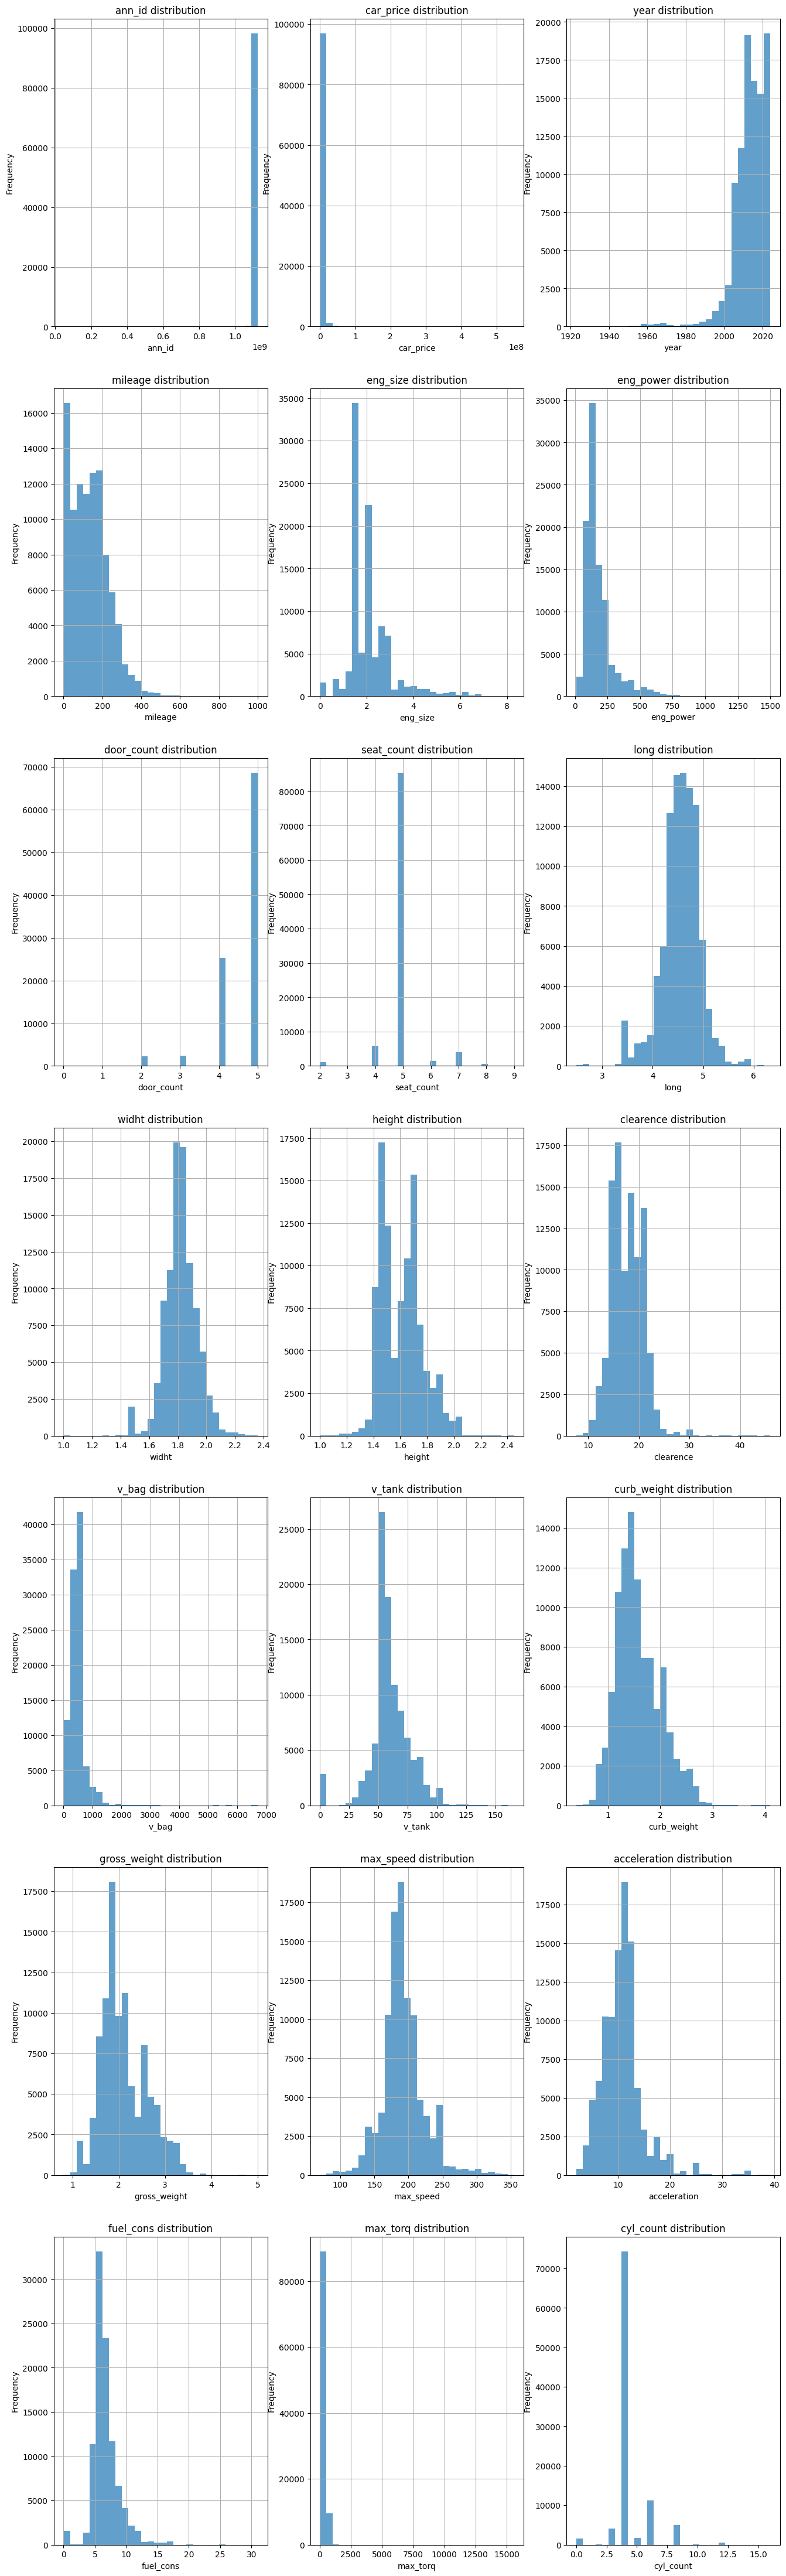

In [54]:
numeric_cols = df.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

В данных наблюдается некоторое искажение: для пробега автомобиля преобладают значения близкие к нулю, возможно влиение параллельного импорта. Посмотрим на разброс данных по стране производства автомобиля

<ipython-input-55-b381b7c01a8f>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_state['mileage'], fill=True)
<ipython-input-55-b381b7c01a8f>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_state['mileage'], fill=True)
<ipython-input-55-b381b7c01a8f>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_state['mileage'], fill=True)


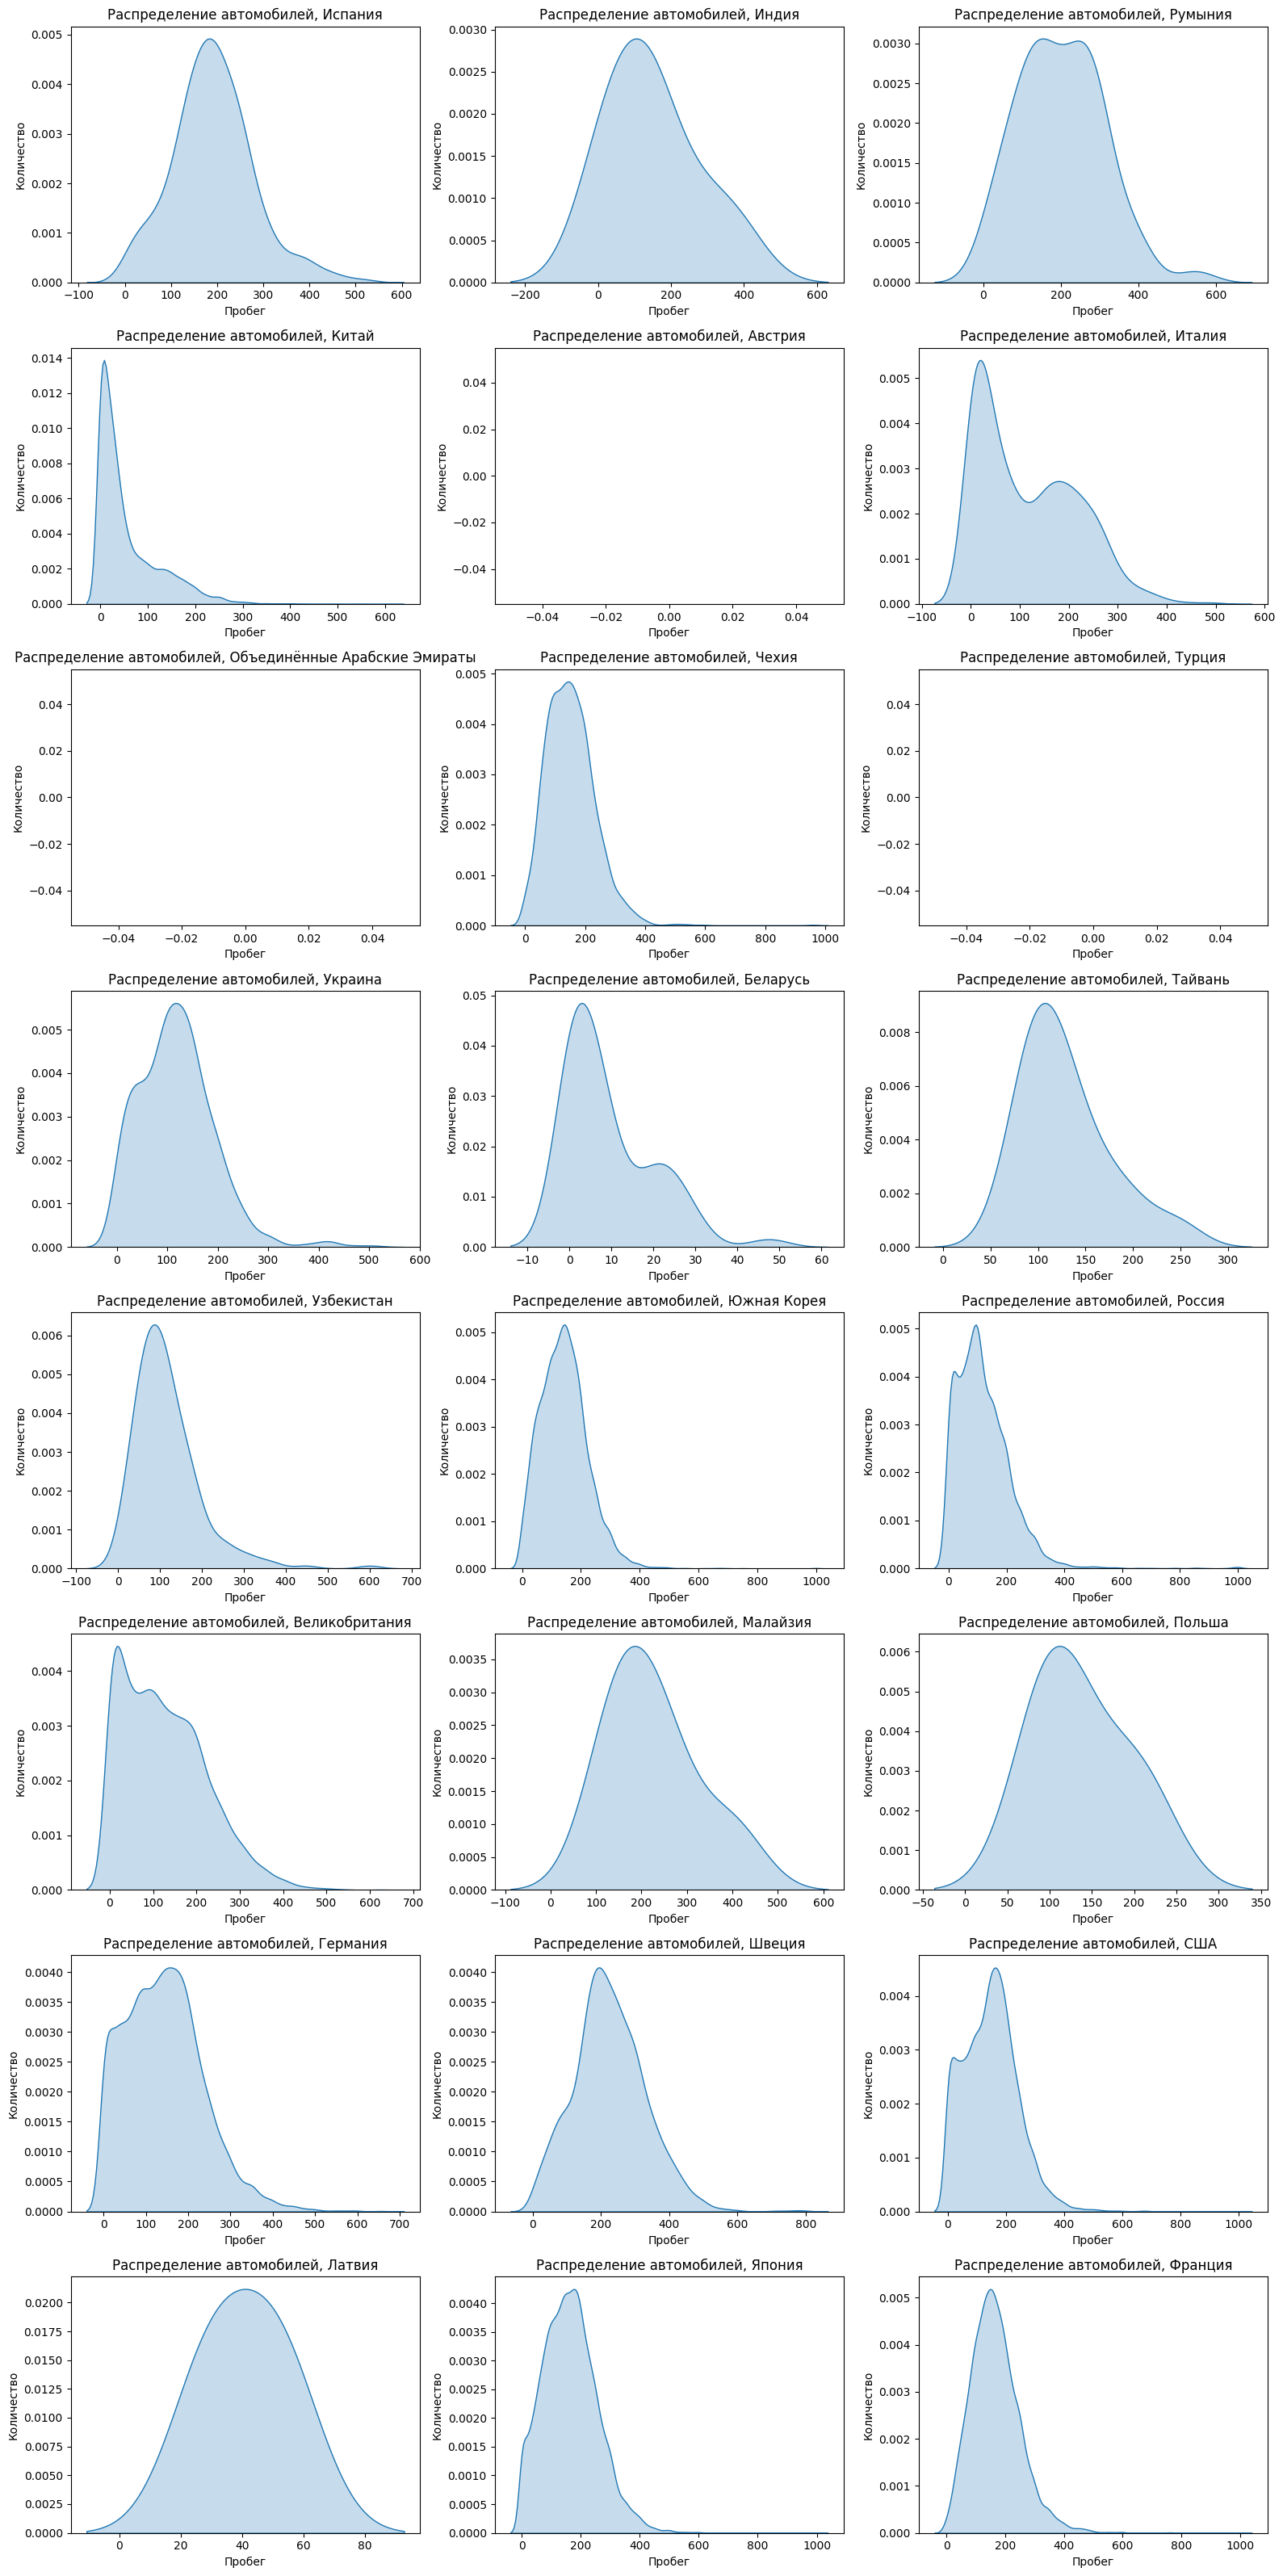

In [55]:
total_axes = len(set(df['state_mark']))
fig = plt.figure(figsize=(16, ((total_axes//3) + (total_axes % 3))*4))
for i, state in enumerate(set(df['state_mark'])):
    ax = fig.add_subplot((total_axes//3) + (total_axes % 3), 3, i+1)
    df_state = df[df['state_mark'] == state]
    sns.kdeplot(df_state['mileage'], fill=True)
    plt.title(f'Распределение автомобилей, {state}')
    plt.xlabel('Пробег')
    plt.ylabel('Количество')
plt.tight_layout()
plt.show()

Наблюдаем сильные искажения для Китая, Беларуси - большинство подержанных автомобилей имеют малый пробег. Кроме того, автомобили из Германии и Японии имеют два пика распределения. Для построения модели скорее всего потребуется исключать автомобили с небольшим пробегом

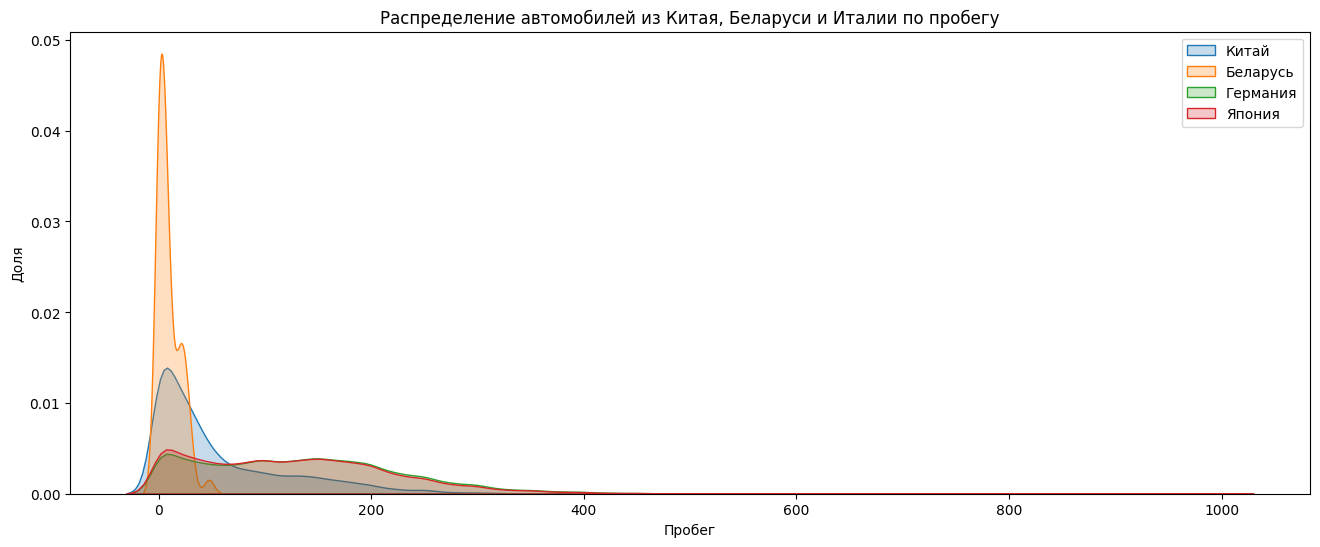

In [56]:
plt.figure(figsize= (16,6))
df_k = df[df['state_mark'] == 'Китай']
df_b = df[df['state_mark'] == 'Беларусь']
df_g = df[df['state_mark'] != 'Германия']
df_j = df[df['state_mark'] != 'Япония']
sns.kdeplot(df_k['mileage'], fill=True, label='Китай')
sns.kdeplot(df_b['mileage'], fill=True, label='Беларусь')
sns.kdeplot(df_g['mileage'], fill=True, label='Германия')
sns.kdeplot(df_j['mileage'], fill=True, label='Япония')
plt.title("Распределение автомобилей из Китая, Беларуси и Италии по пробегу")
plt.xlabel('Пробег')
plt.ylabel('Доля')
plt.legend()
plt.show()

<Axes: >

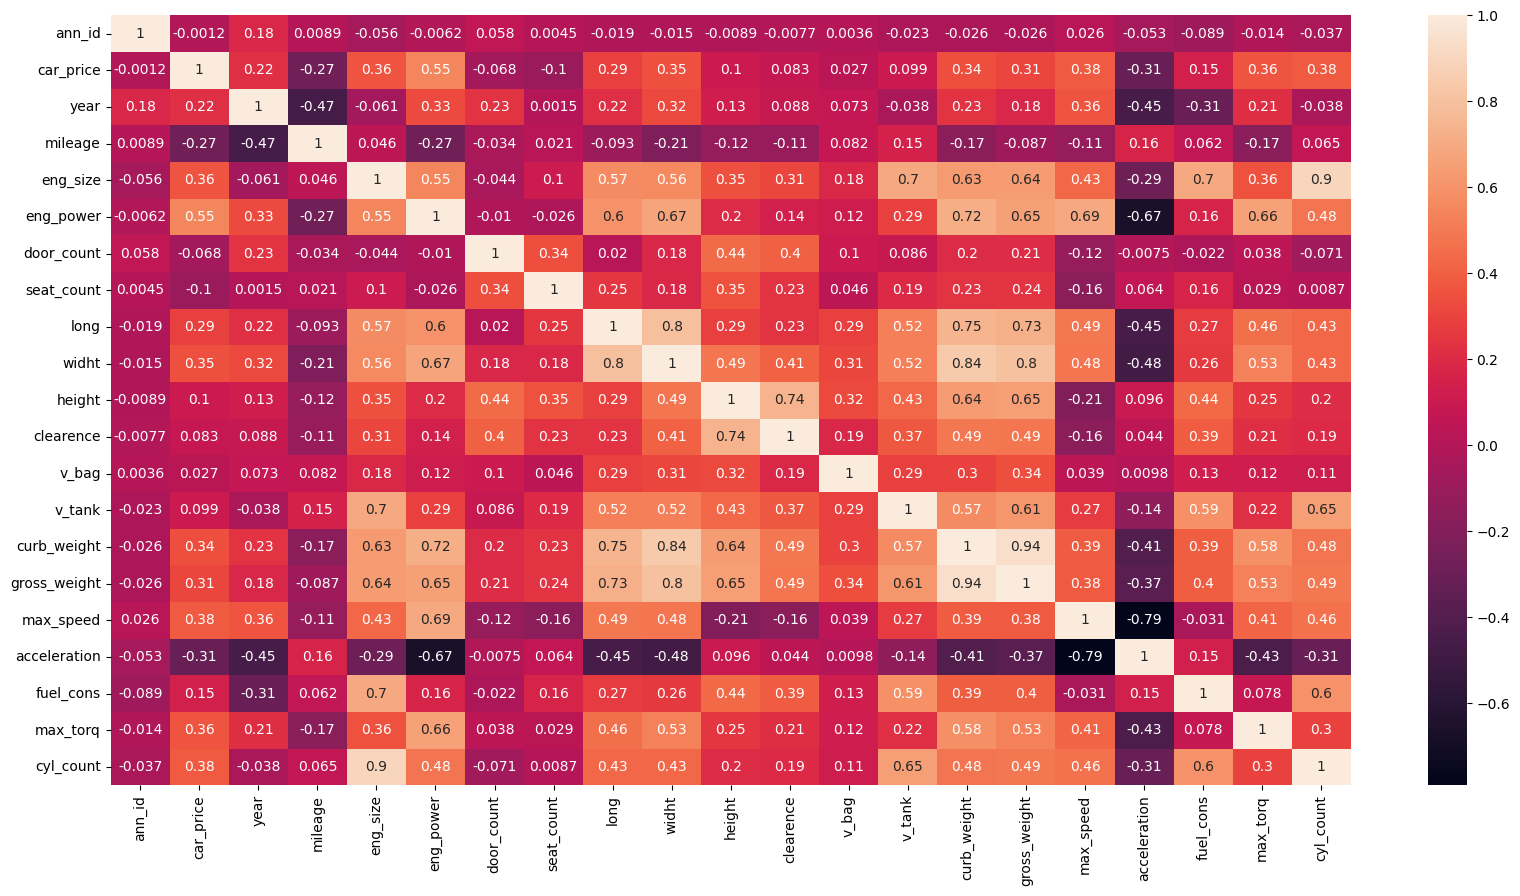

In [57]:
df_corr = df.select_dtypes(['int', 'float'])
plt.figure(figsize= (20,10))
sns.heatmap(df_corr.corr(), annot = True, fmt='.2g')

Цена автомобиля более всего зависит от следующих числовых характеристик (в порядке убывания):
Мощность двигателя, Крутящий момент, Снаряженная масса, Полная масса, Ширина, Длина, Разгон, Максимальная скорость, Год выпуска, Объем двигателя, Пробег.
При этом существуют значимые корреляции между характеристиками:
Мощность двигателя: Крутящий момент, Снаряженная масса, Разгон, Ширина, Полная масса, Длина
Крутящий момент: Мощность двигателя, Cнаряженная масса, Полная масса, Ширина, Длина
Снаряженная масса: Полная масса, Ширина, Крутящий момент, Длина
Полная масса: Снаряженная масса, Крутящий момент, Ширина, Длина
Ширина: Снаряженная масса, Полная масса, Длина, Крутящий момент
Длина: Снаряженная масса, Полная масса, Ширина, Крутящий момент

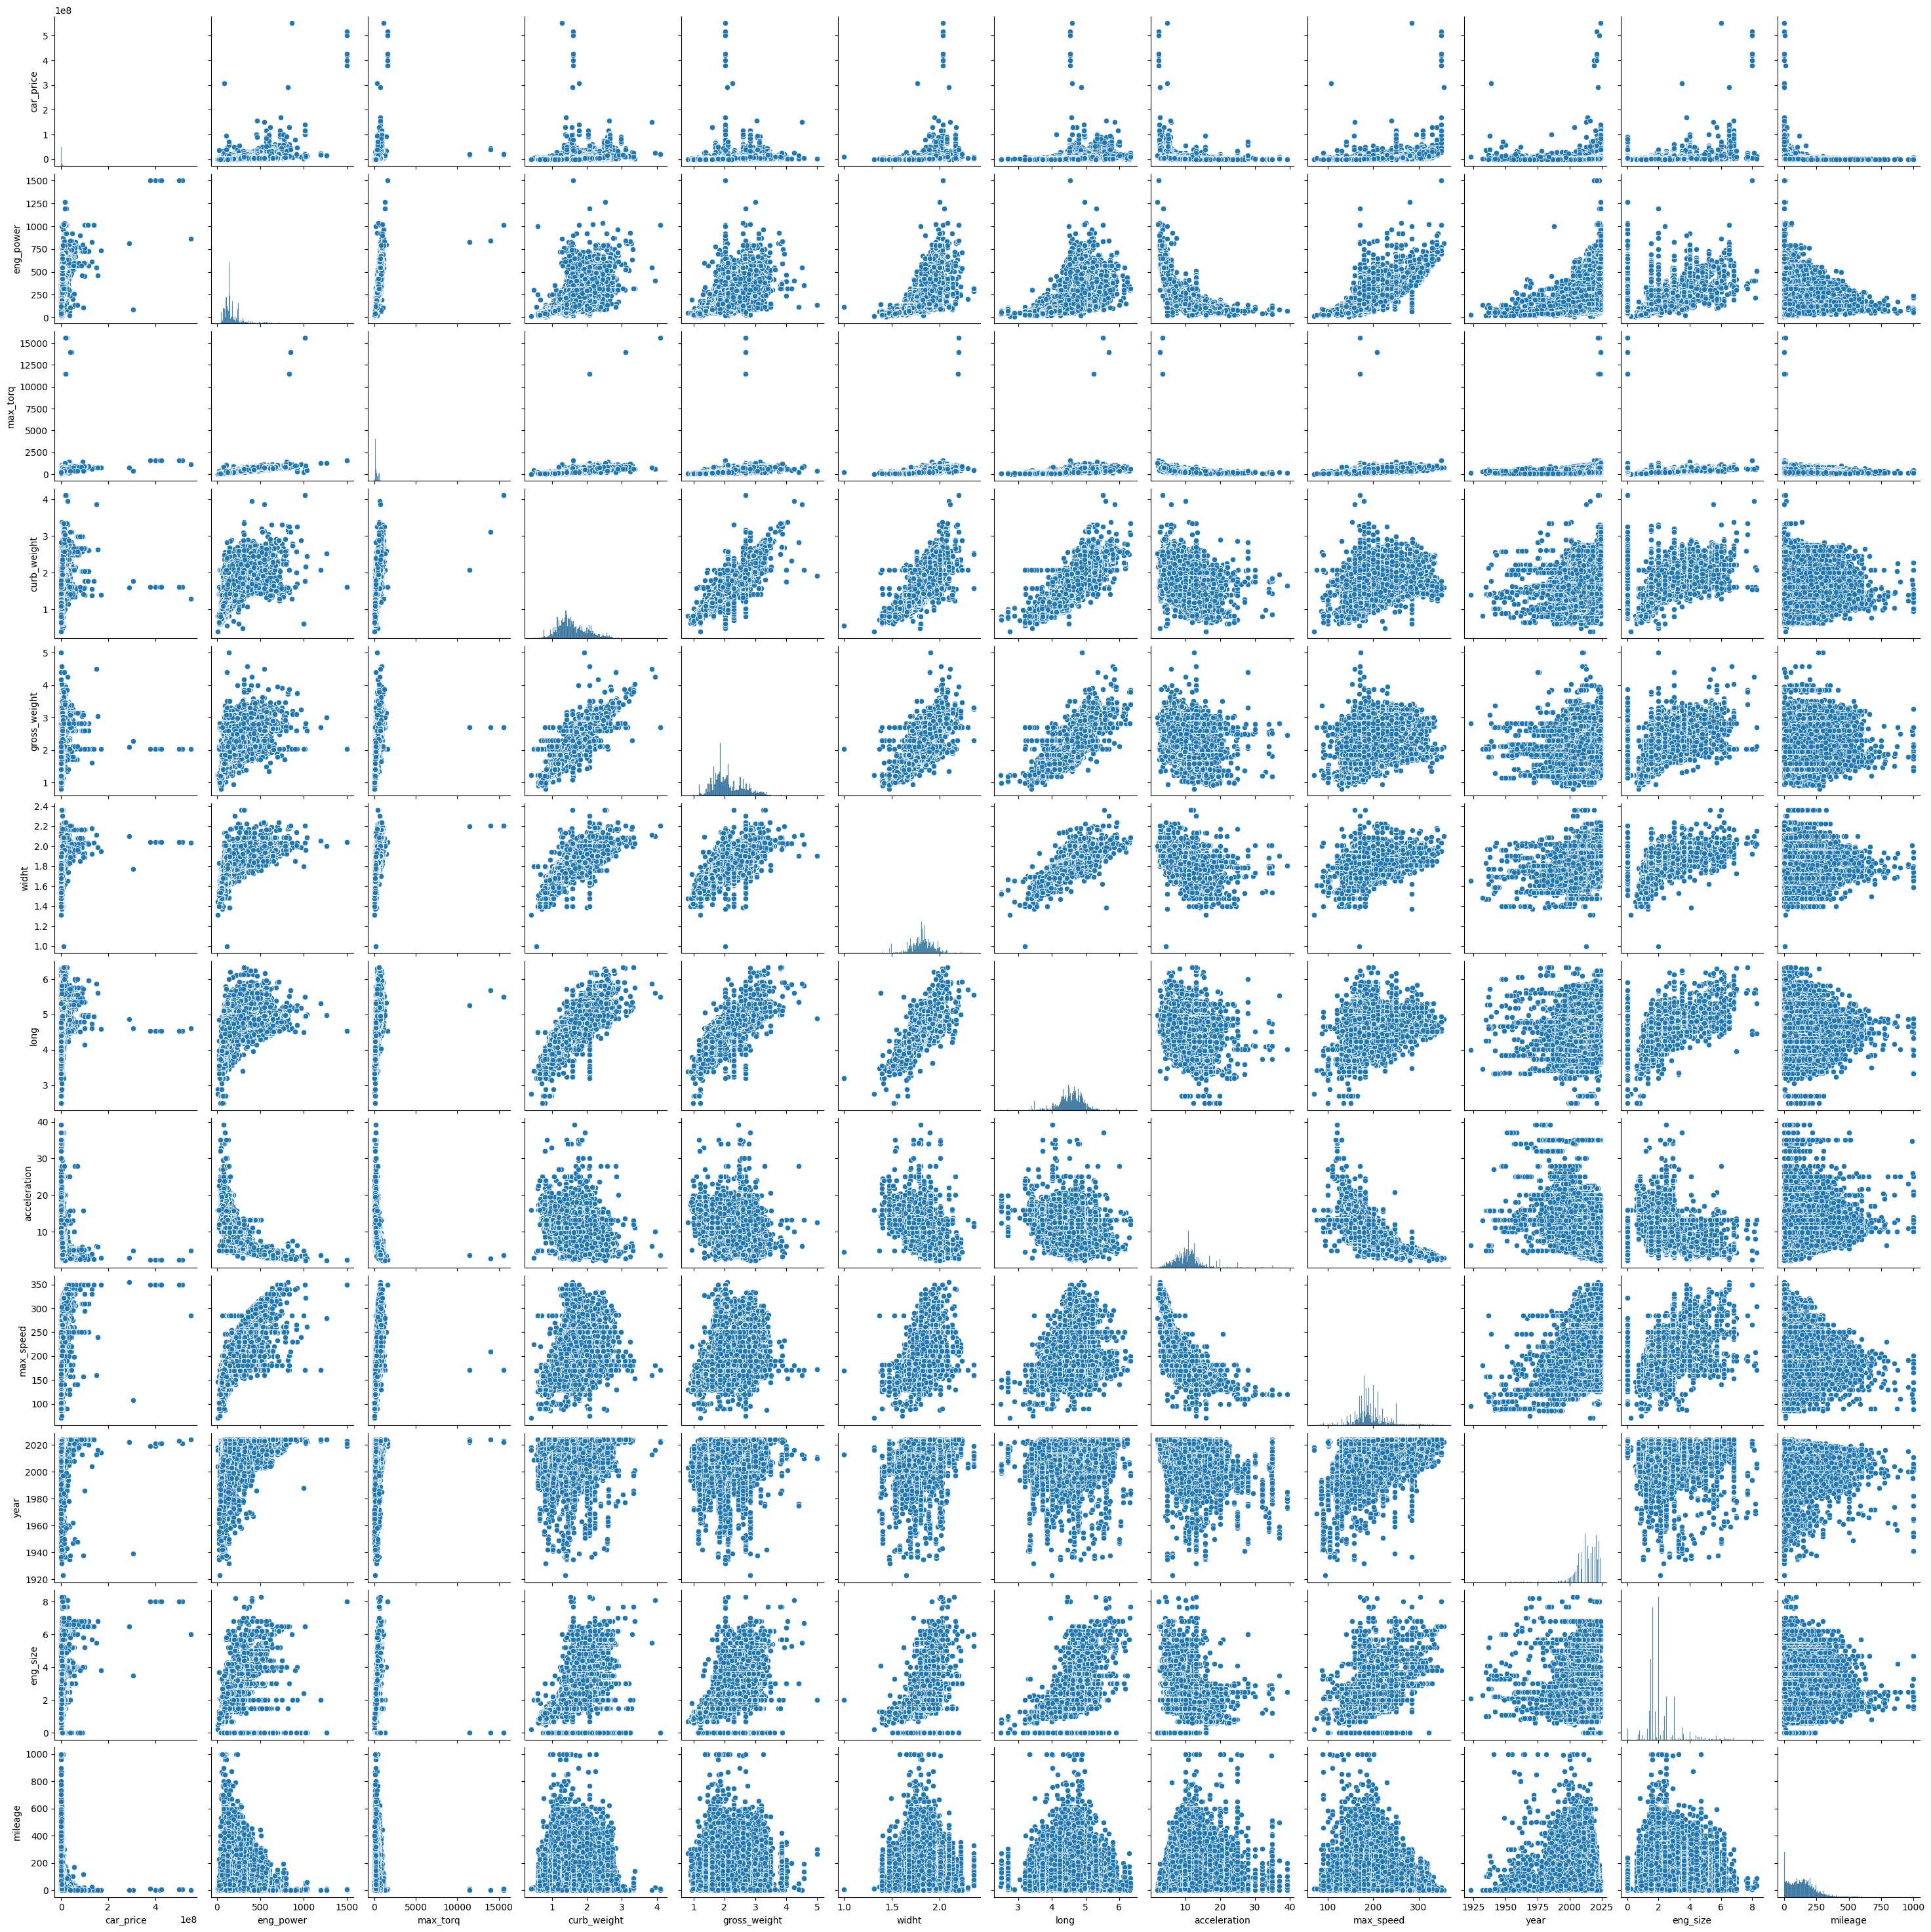

In [58]:
sns.pairplot(df[['car_price', 'eng_power', 'max_torq', 'curb_weight', 'gross_weight', 'widht', 'long', 'acceleration', 'max_speed', 'year', 'eng_size', 'mileage']])

Исходя из представленных графиков, следует рассмотреть возможность исключения из модели данных по одного элемента из пар характеристик:
Крутящий момент - мощность двигателя - разгон
Полная масса - Снаряженная масса
Длина - ширина
Зависимости между ними очень сильные

In [59]:
df = df.reset_index(drop=True)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98577 entries, 0 to 98576
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   url_car       98577 non-null  object        
 1   car_make      98577 non-null  object        
 2   car_model     98577 non-null  object        
 3   car_gen       98577 non-null  object        
 4   car_type      98577 non-null  object        
 5   car_compl     98577 non-null  object        
 6   ann_date      98577 non-null  datetime64[ns]
 7   ann_id        98577 non-null  float64       
 8   car_price     98577 non-null  float64       
 9   ann_city      98577 non-null  object        
 10  link_cpl      98577 non-null  object        
 11  avail         98577 non-null  object        
 12  year          98577 non-null  float64       
 13  mileage       98577 non-null  float64       
 14  color         98577 non-null  object        
 15  eng_size      98577 non-null  float6

In [61]:
df.head()

url_car car_make car_model  \
0  https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
1  https://auto.ru/cars/used/sale/abarth/500/1118...   Abarth       500   
2  https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   
3  https://auto.ru/cars/used/sale/abarth/500/1124...   Abarth       500   
4  https://auto.ru/cars/used/sale/abarth/500/1125...   Abarth       500   

        car_gen       car_type           car_compl   ann_date        ann_id  \
0  I Рестайлинг      Кабриолет   1.4 MT (180 л.с.) 2024-10-30  1.125082e+09   
1             I      Кабриолет   1.4 MT (135 л.с.) 2024-03-17  1.118404e+09   
2  I Рестайлинг      Кабриолет  1.4 AMT (180 л.с.) 2024-09-19  1.125077e+09   
3             I  Хэтчбек 3 дв.   1.4 MT (135 л.с.) 2024-08-15  1.124579e+09   
4  I Рестайлинг  Хэтчбек 3 дв.   1.4 AT (159 л.с.) 2024-10-14  1.125454e+09   

   car_price         ann_city  \
0  2700000.0          Обнинск   
1  1400000.0            Минск   
2  2990000.0  Санкт-Петербург   
3  2100000.0           Москва   
4  1650000.0           Москва   

                                            link_cpl      avail    year  \
0  https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2020.0   
1  https://auto.ru/catalog/cars/abarth/500/240055...  В наличии  2013.0   
2  https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2019.0   
3  https://auto.ru/catalog/cars/abarth/500/240055...  В наличии  2009.0   
4  https://auto.ru/catalog/cars/abarth/500/240056...  В наличии  2016.0   

   mileage        color  eng_size  eng_power eng_type   options  \
0     44.0  серебристый       1.4      180.0   Бензин   1 опция   
1     55.0       чёрный       1.4      135.0   Бензин  26 опций   
2     42.5        белый       1.4      180.0   Бензин   1 опция   
3     47.8        серый       1.4      135.0   Бензин  19 опций   
4     92.0       чёрный       1.4      159.0   Бензин  16 опций   

       transmission     drive st_wheel           condition  count_owner  \
0      механическая  передний    Левый  Не требует ремонта   1 владелец   
1      механическая  передний    Левый  Не требует ремонта   1 владелец   
2  роботизированная  передний    Левый  Не требует ремонта   1 владелец   
3      механическая  передний    Левый  Не требует ремонта  3 или более   
4    автоматическая  передний    Левый  Не требует ремонта  3 или более   

  original_pts     customs                                          url_compl  \
0     Оригинал  Растаможен  https://auto.ru/catalog/cars/abarth/500/240056...   
1     Оригинал  Растаможен  https://auto.ru/catalog/cars/abarth/500/240055...   
2     Оригинал  Растаможен  https://auto.ru/catalog/cars/abarth/500/240056...   
3     Оригинал  Растаможен  https://auto.ru/catalog/cars/abarth/500/240055...   
4     Оригинал  Растаможен  https://auto.ru/catalog/cars/abarth/500/240056...   

  state_mark class_auto  door_count  seat_count   long  widht  height  \
0     Италия          A         2.0         4.0  3.571  1.627   1.488   
1     Италия          A         3.0         5.0  3.546  1.627   1.488   
2     Италия          A         2.0         4.0  3.571  1.627   1.488   
3     Италия          A         3.0         4.0  3.546  1.627   1.488   
4     Италия          A         3.0         4.0  3.571  1.627   1.488   

   clearence  v_bag  v_tank  curb_weight  gross_weight front_brakes  \
0       10.4  185.0    35.0     1.045000      1.224216     дисковые   
1       14.0  185.0    35.0     0.816885      1.224216     дисковые   
2       10.4  185.0    35.0     1.045000      1.224216     дисковые   
3       12.5  185.0    70.0     1.035000      1.380000     дисковые   
4       10.4  268.0    40.0     1.141000      1.224216     дисковые   

  rear_brakes   max_speed  acceleration  fuel_cons   turbocharg  max_torq  \
0    дисковые  225.000000           6.7        4.9  турбонаддув     250.0   
1    дисковые  146.518668           6.9        7.1  турбонаддув     206.0   
2    дисковые  225.000000      

# LinearRegression

***Модель только на вещественных признаках***

In [62]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [63]:
df_num = df.copy()
df_num = df_num.select_dtypes(include=['int' , 'float64'])

Линейная модель со стандартизацией признаков:

In [64]:
X = df_num.drop(columns=['car_price', 'ann_id'])
y = df_num['car_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

R^2: 0.3857726040610663
MSE: 28919075358983.676


In [65]:
coeffs = model.coef_
coeffs_df = pd.DataFrame({'Признак': X_train.columns , 'Веса': coeffs})
coeffs_df

Признак          Веса
0           year  4.479720e+05
1        mileage -7.040716e+05
2       eng_size -6.956852e+05
3      eng_power  3.102339e+06
4     door_count -2.661293e+05
5     seat_count -3.506389e+05
6           long  3.240065e+05
7          widht  4.010590e+05
8         height  4.918463e+05
9      clearence  1.742604e+05
10         v_bag -7.011614e+04
11        v_tank -1.443954e+06
12   curb_weight -9.813890e+05
13  gross_weight  1.210175e+05
14     max_speed  3.641490e+05
15  acceleration  1.026681e+06
16     fuel_cons  2.237715e+05
17      max_torq  2.255794e+05
18     cyl_count  2.528849e+06

Модель Lasso со стандартизацией признаков:

In [66]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1 , random_state = 42)
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

R^2: 0.39081669777055916
MSE: 25882233882453.902


Модель Lasso с кросс валидацией со стандартизацией признаков:

In [67]:
from sklearn.model_selection import GridSearchCV

grid = {'alpha': np.logspace(-3, 6, 100)}
lasso = Lasso(random_state=42)
grid_search = GridSearchCV(estimator = lasso, param_grid = grid, scoring = 'neg_mean_squared_error',
    cv = 10, n_jobs = -1, verbose = 1)

grid_search.fit(X_train_scaled, y_train)
grid_model = grid_search.best_estimator_

y_pred = grid_model.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
R^2: 0.39081669777363426
MSE: 25882233882323.254


In [68]:
coeffs_grid = grid_model.coef_
coeffs_grid = pd.DataFrame({'Признак': X_train.columns , 'Веса': coeffs_grid})
coeffs_grid

Признак          Веса
0           year  4.479720e+05
1        mileage -7.040716e+05
2       eng_size -6.956852e+05
3      eng_power  3.102339e+06
4     door_count -2.661292e+05
5     seat_count -3.506389e+05
6           long  3.240065e+05
7          widht  4.010590e+05
8         height  4.918463e+05
9      clearence  1.742604e+05
10         v_bag -7.011614e+04
11        v_tank -1.443954e+06
12   curb_weight -9.813890e+05
13  gross_weight  1.210175e+05
14     max_speed  3.641490e+05
15  acceleration  1.026681e+06
16     fuel_cons  2.237715e+05
17      max_torq  2.255794e+05
18     cyl_count  2.528849e+06

Модель ElasticNet со стандартизацией признаков:

In [96]:
from sklearn.linear_model import ElasticNet

grid_elastic = {'alpha': np.logspace(-3, 6, 100),
        'l1_ratio': np.linspace(0.1 , 1, 50) }

elastic = ElasticNet(random_state=42)
grid_search_elastic = GridSearchCV(estimator = elastic, param_grid = grid_elastic, scoring = 'neg_mean_squared_error',
    cv = 10, n_jobs = -1, verbose = 1)

grid_search_elastic.fit(X_train_scaled, y_train)
grid_model_elastic = grid_search_elastic.best_estimator_

y_pred = grid_model_elastic.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

Fitting 10 folds for each of 5000 candidates, totalling 50000 fits
R^2: 0.3907735617922301
MSE: 25884066591058.645


Модель Ridge со стандартизацией признаков:

In [70]:
from sklearn.linear_model import Ridge

grid_ridge = {'alpha': np.logspace(-5, 10, 1000)}

ridge = Ridge(random_state=42)
grid_search_ridge = GridSearchCV(estimator = ridge, param_grid = grid_ridge, scoring = 'r2',
    cv = 10, n_jobs = -1, verbose = 1)

grid_search_ridge.fit(X_train_scaled, y_train)
grid_model_ridge = grid_search_ridge.best_estimator_

y_pred = grid_model_ridge.predict(X_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
R^2: 0.38820591019487305
MSE: 25993157826698.625


In [72]:
Q1 = df['car_price'].quantile(0.25)
Q3 = df['car_price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['car_price'] < (Q1 - 1.5 * IQR)) | (df['car_price'] > (Q3 + 1.5 * IQR))]
outliers

url_car car_make car_model  \
8      https://auto.ru/cars/used/sale/ac/cobra/111971...       AC     Cobra   
10     https://auto.ru/cars/used/sale/acura/mdx/11229...    Acura       MDX   
29     https://auto.ru/cars/used/sale/acura/mdx/11250...    Acura       MDX   
218    https://auto.ru/cars/used/sale/acura/mdx/11213...    Acura       MDX   
219    https://auto.ru/cars/used/sale/acura/rdx/11213...    Acura       RDX   
...                                                  ...      ...       ...   
98456  https://auto.ru/cars/used/sale/zis/110/1120621...      ЗиС       110   
98457  https://auto.ru/cars/used/sale/zis/110/1122366...      ЗиС       110   
98458  https://auto.ru/cars/used/sale/zis/110/1106214...      ЗиС       110   
98459  https://auto.ru/cars/used/sale/zis/101/1124188...      ЗиС       101   
98460  https://auto.ru/cars/used/sale/zis/101/1102639...      ЗиС       101   

              car_gen           car_type              car_compl   ann_date  \
8              Mk III            Родстер      7.0 MT (416 л.с.) 2024-07-13   
10                 IV  Внедорожник 5 дв.  3.5 AT (290 л.с.) 4WD 2024-10-30   
29                 IV  Внедорожник 5 дв.  3.5 AT (290 л.с.) 4WD 2024-09-17   
218                IV  Внедорожник 5 дв.  3.5 AT (290 л.с.) 4WD 2024-05-20   
219    III Рестайлинг  Внедорожник 5 дв.  2.0 AT (272 л.с.) 4WD 2024-01-22   
...               ...                ...                    ...        ...   
98456       1945-1958            Лимузин      6.0 MT (140 л.с.) 2024-09-24   
98457       1945-1958            Лимузин      6.0 MT (140 л.с.) 2024-02-23   
98458       1945-1958            Лимузин      6.0 MT (140 л.с.) 2024-12-06   
98459       1936-1941              Седан      5.8 MT (110 л.с.) 2024-07-16   
98460       1936-1941              Седан      5.8 MT (110 л.с.) 2024-03-01   

             ann_id   car_price                     ann_city  \
8      1.119714e+09   9000000.0                 Екатеринбург   
10     1.122932e+09  13400000.0                       Москва   
29     1.125050e+09   7100000.0                  Новосибирск   
218    1.121321e+09  12158969.0                  Владивосток   
219    1.121321e+09   8825058.0                  Владивосток   
...             ...         ...                          ...   
98456  1.120622e+09  14000000.0                       Москва   
98457  1.122367e+09  70000000.0                       Москва   
98458  1.106214e+09  15000000.0                      Ташкент   
98459  1.124189e+09  95000000.0                  Новосибирск   
98460  1.102640e+09  40000000.0  Москва и Московская область   

                                                link_cpl      avail    year  \
8      https://auto.ru/catalog/cars/ac/cobra/20651670...  В наличии  1967.0   
10     https://auto.ru/catalog/cars/acura/mdx/2294726...  В наличии  2023.0   
29     https://auto.ru/catalog/cars/acura/mdx/2294726...  В наличии  2022.0   
218    https://auto.ru/catalog/cars/acura/mdx/2294726...   На заказ  2024.0   
219    https://auto.ru/catalog/cars/acura/rdx/2333540...   На заказ  2024.0   
...                                                  ...        ...     ...   
98456  https://auto.ru/catalog/cars/zis/110/20701218/...  В наличии  1947.0   
98457  https://auto.ru/catalog/cars/zis/110/20701218/...  В наличии  1948.0   
98458  https://auto.ru/catalog/cars/zis/110/20701218/...  В наличии  1950.0   
98459  https://auto.ru/catalog/cars/zis/101/20787306/...  В наличии  1938.0   
98460  https://auto.ru/catalog/cars/zis/101/20787306/...  В наличии  1938.0   

       mileage   color  eng_size  eng_power eng_type    options  \
8        5.000   белый       7.0      416.0   Бензин    1 опция   
10       0.158   белый       3.5      290.0   Бензин  117 опций   
29      31.000   серый       3.5      290.0   Бензин    2 опции   
218      8.000  чёрный       3.5      290.0   Бензин    1 опция   
219      9.000   серый       2.0      272.0   Бензин    1 опция   
...        ...     ...       ...        ...

In [74]:
df.columns

Index(['url_car', 'car_make', 'car_model', 'car_gen', 'car_type', 'car_compl',
       'ann_date', 'ann_id', 'car_price', 'ann_city', 'link_cpl', 'avail',
       'year', 'mileage', 'color', 'eng_size', 'eng_power', 'eng_type',
       'options', 'transmission', 'drive', 'st_wheel', 'condition',
       'count_owner', 'original_pts', 'customs', 'url_compl', 'state_mark',
       'class_auto', 'door_count', 'seat_count', 'long', 'widht', 'height',
       'clearence', 'v_bag', 'v_tank', 'curb_weight', 'gross_weight',
       'front_brakes', 'rear_brakes', 'max_speed', 'acceleration', 'fuel_cons',
       'turbocharg', 'max_torq', 'cyl_count'],
      dtype='object')

In [77]:
df.select_dtypes(include=['object']).nunique()

url_car         98577
car_make          211
car_model        1890
car_gen          1169
car_type          262
car_compl        5705
ann_city         3322
link_cpl        17152
avail               3
color              16
eng_type            5
options          2853
transmission        4
drive               3
st_wheel            2
condition           1
count_owner         3
original_pts        2
customs             1
url_compl       17152
state_mark         24
class_auto         10
front_brakes        3
rear_brakes         3
turbocharg          3
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98577 entries, 0 to 98576
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   url_car       98577 non-null  object        
 1   car_make      98577 non-null  object        
 2   car_model     98577 non-null  object        
 3   car_gen       98577 non-null  object        
 4   car_type      98577 non-null  object        
 5   car_compl     98577 non-null  object        
 6   ann_date      98577 non-null  datetime64[ns]
 7   ann_id        98577 non-null  float64       
 8   car_price     98577 non-null  float64       
 9   ann_city      98577 non-null  object        
 10  link_cpl      98577 non-null  object        
 11  avail         98577 non-null  object        
 12  year          98577 non-null  float64       
 13  mileage       98577 non-null  float64       
 14  color         98577 non-null  object        
 15  eng_size      98577 non-null  float6

Выберем некоторые только некоторые признаки для обучения. А также закодируем некоторые столбцы.

In [91]:
from sklearn.preprocessing import LabelEncoder

ohe_columns = ['eng_type', 'transmission', 'drive', 'st_wheel',
               'count_owner', 'original_pts', 'front_brakes',
               'rear_brakes', 'turbocharg']
df_ohe = pd.get_dummies(df, columns=ohe_columns)

label_columns = ['car_make', 'car_model', 'car_type', 'state_mark', 'class_auto']

label_encoder = LabelEncoder()

for col in label_columns:
    df_ohe[col] = label_encoder.fit_transform(df_ohe[col])
df_ohe = df_ohe.drop(columns = ['url_car' , 'car_gen', 'car_compl',
       'ann_date', 'ann_id', 'car_price', 'ann_city', 'link_cpl', 'avail',
        'mileage', 'color',
       'options', 'condition', 'customs','url_compl', 'door_count', 'seat_count', 'widht', 'height',
       'clearence', 'v_bag', 'gross_weight', 'max_speed', 'fuel_cons'])

In [92]:
df_ohe = df_ohe.replace({True: 1, False: 0})

<ipython-input-92-019ff4ca6e82>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ohe = df_ohe.replace({True: 1, False: 0})


In [97]:
df_num_feat = df[['eng_size', 'eng_power', 'long', 'curb_weight',
                  'acceleration', 'max_torq', 'cyl_count', 'year', 'v_tank']]
X_new = pd.concat([df_ohe, df_num_feat], axis=1)
y = df['car_price']

X_new_train, X_new_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

X_new_train_scaled = scaler.fit_transform(X_new_train)
X_new_test_scaled = scaler.transform(X_new_test)

model = LinearRegression()
model.fit(X_new_train_scaled, y_train)

y_pred = model.predict(X_new_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = MSE(y_test, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

R^2: 0.41727389626532985
MSE: 27435930437113.35


Точность выросла, однако она еще маленькая.

Попробуем модель Lasso.

In [100]:
lasso = Lasso(alpha = 1.5 , random_state = 42)
lasso.fit(X_new_train_scaled, y_train)

y_pred = lasso.predict(X_new_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

R^2: 0.4177227181538551
MSE: 24739083848863.105


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.066e+17, tolerance: 3.141e+14
  model = cd_fast.enet_coordinate_descent(


Попробуем модель Lasso с кросс-валидацией.

In [101]:
grid = {'alpha': np.logspace(-3, 6, 100)}
lasso = Lasso(random_state=42)
grid_search = GridSearchCV(estimator = lasso, param_grid = grid, scoring = 'neg_mean_squared_error',
    cv = 10, n_jobs = -1, verbose = 1)

grid_search.fit(X_new_train_scaled, y_train)
grid_model = grid_search.best_estimator_

y_pred = grid_model.predict(X_new_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
R^2: 0.4177205345460008
MSE: 24739176623318.656


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.366e+16, tolerance: 3.141e+14
  model = cd_fast.enet_coordinate_descent(


Попробуем модель ElasticNet:

In [103]:
from sklearn.linear_model import ElasticNet

In [104]:
grid_elastic = {'alpha': np.logspace(-3, 6, 20),
        'l1_ratio': np.linspace(0.1 , 1, 10) }

elastic = ElasticNet(random_state=42)
grid_search_elastic = GridSearchCV(estimator = elastic, param_grid = grid_elastic, scoring = 'neg_mean_squared_error',
    cv = 10, n_jobs = -1, verbose = 1)

grid_search_elastic.fit(X_new_train_scaled, y_train)
grid_model_elastic = grid_search_elastic.best_estimator_

y_pred = grid_model_elastic.predict(X_new_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
R^2: 0.41759765746572985
MSE: 24744397274178.133


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.197e+17, tolerance: 3.141e+14
  model = cd_fast.enet_coordinate_descent(


Попробуем модель Ridge:

In [106]:
grid_ridge = {'alpha': np.logspace(-5, 10, 100)}

ridge = Ridge(random_state=42)
grid_search_ridge = GridSearchCV(estimator = ridge, param_grid = grid_ridge, scoring = 'r2',
    cv = 10, n_jobs = -1, verbose = 1)

grid_search_ridge.fit(X_new_train_scaled, y_train)
grid_model_ridge = grid_search_ridge.best_estimator_

y_pred = grid_model_ridge.predict(X_new_train_scaled)
r2 = r2_score(y_train, y_pred)
mse = MSE(y_train, y_pred)
print('R^2:' , r2)
print('MSE:' , mse)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
R^2: 0.4131345332503592
MSE: 24934021028417.48
